# Project Data Analytics: Brazilian E-Commerce Public Dataset by Olist

- Name: Stefanus Bernard Melkisedek
- Email: stefanussipahutar@gmail.com
- Id Dicoding: stefansphtr


## Define Business Questions

| **NO** | **BUSINESS QUESTION**                                                                                                                  |
| :----: | -------------------------------------------------------------------------------------------------------------------------------------- |
|   1.   | Which product category has the most outstanding performance in terms of rating reviews from 2017 to 2018?                              |
|   2.   | What is our current on-time delivery rate, and how can we improve it to meet customer expectations and increase customer satisfaction? |
|   3.   | What is the demographic profile of our customer base?                                                                                  |
|   4.   | During the final quarter of 2018, what was the purchasing frequency of the customers?                                                  |
|   5.   | What was the amount of money customers spent during the last three months of 2018?                                                     |


## Prepare all the library needed


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from module.plotMissingValue import percentage as pmv

## Data Wrangling


### Gathering Data


The data is downloaded from Kaggle, the link is [here](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv). The data is in csv format, so we can use pandas to read the data.


1. Read the customer data and save it to variable `customers_df`


In [2]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


2. Read the geolocation data and save it to variable `geolocation_df`


In [3]:
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


3. Read the order items data and save it to variable `order_items_df`


In [4]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


4. Read the order payments data and save it to variable `order_payments_df`


In [5]:
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


5. Read the order reviews data and save it to variable `order_reviews_df`


In [6]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


6. Read the orders data and save it to variable `orders_df`


In [7]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


7. Read the products data and save it to variable `products_df`


In [8]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


8. Read the product category name data and save it to variable `product_category_name_df`


In [9]:
product_category_name_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


9. Read the sellers data and save it to variable `sellers_df`


In [10]:
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data


#### Assess the customers table


In [11]:
# Check the summary of the dataset and its columns
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
# Check the missing value in the table customers_df
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
# Check the duplicate value in the table customers_df
duplicate_value = customers_df.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [14]:
# Check statistics of the table customers_df
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Assess the orders table


In [15]:
# Check the summary of the dataset and its columns
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
# Check the missing value in the table orders_df
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [17]:
# Check the duplicate value in the table orders_df
duplicate_value = orders_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


#### Assess the order_items table


In [18]:
# Check the summary of the dataset and its columns
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
# Check the missing value in the table order_items_df
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
# Check the duplicate value in the table order_items_df
duplicate_value = order_items_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [21]:
# Check the duplicate value in order lines
order_lines_duplicate = order_items_df[["order_id", "product_id"]].duplicated().sum()
print(f"Total duplicate value in order lines: {order_lines_duplicate}")

Total duplicate value in order lines: 10225


Note!
The structure of order items table is not using order quantities, but repeating order lines for each product. So, we need to calculate the total quantity of each product ordered.


In [22]:
# Check the statistics of the table order_items_df
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [23]:
print(order_items_df.loc[order_items_df["freight_value"].idxmax()])

order_id               a77e1550db865202c56b19ddc6dc4d53
order_item_id                                         1
product_id             ec31d2a17b299511e7c8627be9337b9b
seller_id              257e61d3251fb5efb9daadddbc2cf7ca
shipping_limit_date                 2018-04-25 06:55:13
price                                             979.0
freight_value                                    409.68
Name: 73486, dtype: object


<Axes: xlabel='price'>

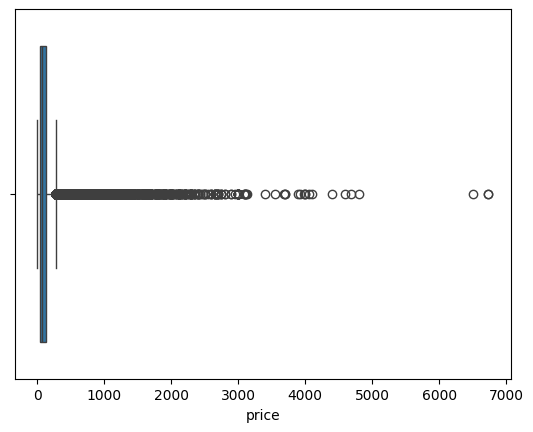

In [24]:
# Plot the boxplot of the feature price
sns.boxplot(x=order_items_df["price"])

<Axes: xlabel='price', ylabel='Count'>

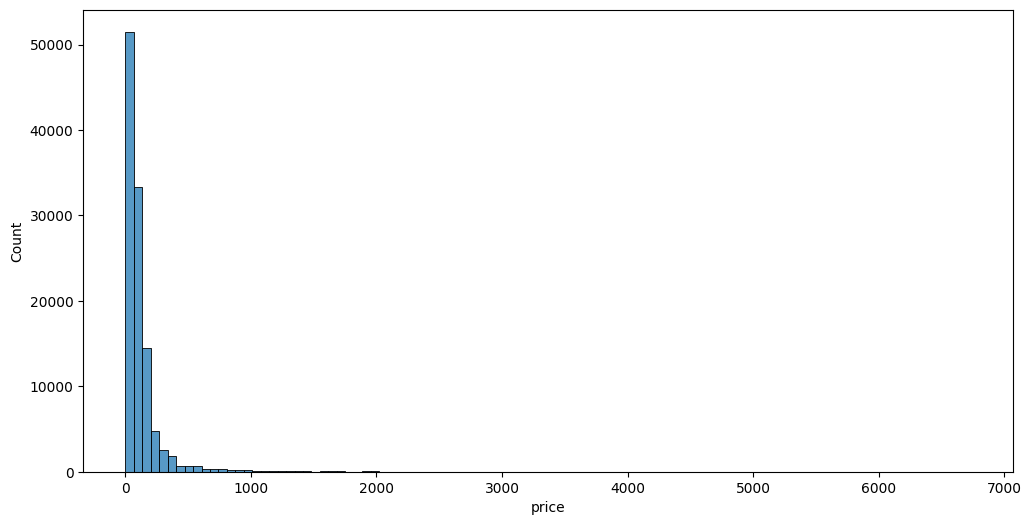

In [25]:
# Plot the histogram of the attribute price
plt.figure(figsize=(12, 6))

sns.histplot(data=order_items_df, x="price", bins=100)

<Axes: xlabel='freight_value'>

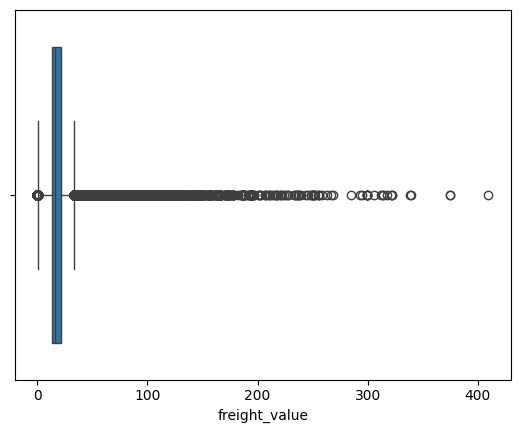

In [26]:
# Plot the boxplot of the feature freight_value
sns.boxplot(x=order_items_df["freight_value"])

<Axes: xlabel='freight_value', ylabel='Count'>

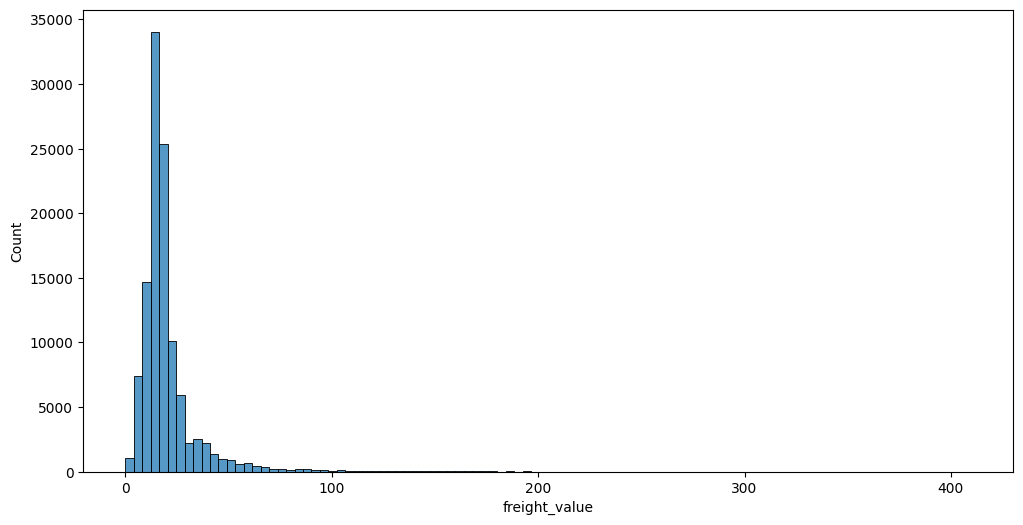

In [27]:
# Plot the histogram of the attribute freight_value
plt.figure(figsize=(12, 6))

sns.histplot(data=order_items_df, x="freight_value", bins=100)

#### Assess the order_payments table


In [28]:
# Check the summary of the dataset and its columns
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [29]:
# Check  the missing value in the table order_payments_df
order_payments_df.isnull().sum().sort_values(ascending=False)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [30]:
# Check the duplicate value in the table order_payments_df
duplicate_value = order_payments_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [31]:
# Check the statistics
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


<Axes: xlabel='payment_value'>

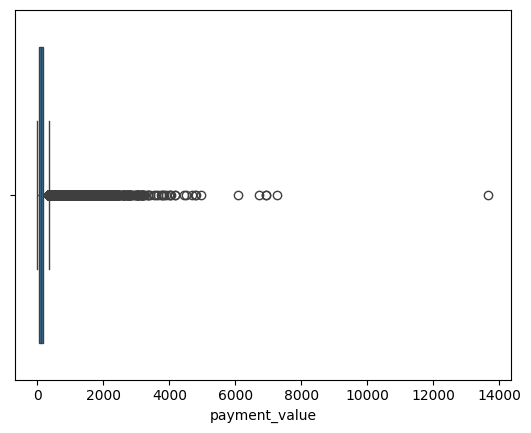

In [32]:
# Plot the boxplot of the feature payment_value
sns.boxplot(x=order_payments_df["payment_value"])

#### Assess the order_reviews table


In [33]:
# Check the summary of the dataset and its columns
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [34]:
# Check the missing value in the table order_reviews_df
order_reviews_df.isnull().sum().sort_values(ascending=False)

review_comment_title       87656
review_comment_message     58247
review_id                      0
review_score                   0
order_id                       0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [35]:
# Check the duplicate value in the table order_reviews_df
duplicate_value = order_reviews_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [36]:
# Check the statistics
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Assess the products table


In [37]:
# Check the summary of the dataset and its columns
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Note:
The code below will return `True` if there are any decimal values in the 'product_name_lenght' column, and `False` otherwise.
Since there is no decimal values in the 'product_name_lenght' column, we can convert the data type to integer.


In [38]:
# Check the decimal values in the attribute product_name_lenght
products_df["product_name_lenght"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [39]:
# Check the decimal values in the attribute product_description_lenght
products_df["product_description_lenght"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [40]:
# Check the decimal values in the attribute product_photos_qty
products_df["product_photos_qty"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [41]:
# Check the decimal values in the attribute product_weight_g
products_df["product_weight_g"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [42]:
# Check the decimal values in the attribute product_length_cm
products_df["product_length_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [43]:
# Check the decimal values in the attribute product_height_cm
products_df["product_height_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [44]:
# Check the decimal values in the attribute product_width_cm
products_df["product_width_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [45]:
# Check the missing value in the table products_df
products_df.isnull().sum().sort_values(ascending=False)

product_category_name         610
product_description_lenght    610
product_name_lenght           610
product_photos_qty            610
product_weight_g                2
product_height_cm               2
product_length_cm               2
product_width_cm                2
product_id                      0
dtype: int64

In [46]:
# Check the duplicate value in the table products_df
duplicate_value = products_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [47]:
# Check the statistics
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Assess the product_category table


In [48]:
# Check the summary of the dataset and its columns
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [49]:
# Check the missing value in the table product_category_name_df
product_category_name_df.isnull().sum().sort_values(ascending=False)

product_category_name            0
product_category_name_english    0
dtype: int64

In [50]:
# Check the duplicate value in the table product_category_name_df
duplicate_value = product_category_name_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [51]:
# Check the statistics
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Assess the sellers table


In [52]:
# Check the summary of the dataset and its columns
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [53]:
# Check the missing value in the table sellers_df
sellers_df.isnull().sum().sort_values(ascending=False)

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [54]:
# Check the duplicate value in the table sellers_df
duplicate_value = sellers_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


#### Assess the geolocation table


In [55]:
# Check the summary of the dataset and its columns
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [56]:
# Check the missing value in the table geolocation_df
geolocation_df.isnull().sum().sort_values(ascending=False)

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [57]:
# Check the duplicate value in the table geolocation_df
duplicate_value = geolocation_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 261831


#### Summary of Assessment


Table of Assessment Summary

| **NO** |    **TABLE NAME**     |                                                                                       **DATA TYPE**                                                                                       |                                                                                                 **MISSING VALUE**                                                                                                 |                             **DUPLICATE DATA**                             |                **INACCURATE VALUE**                 |
| :----: | :-------------------: | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: | :------------------------------------------------------------------------: | :-------------------------------------------------: |
|   1.   |       customers       |                                                             There is one invalid data type at column customer_zip_code_prefix                                                             |                                                                                                         -                                                                                                         |                                     -                                      |                          -                          |
|   2.   |        orders         |                                         There are five invalid data type starts from order_purchase_timestamp until order_estimated_delivery_date                                         |                                            There are three columns with missing values: order_approved_at, order_delivered_carrier_date, order_delivered_customer_date                                            |                                     -                                      |                          -                          |
|   3.   |      order_items      |                                                                  There is one invalid data type in column order_item_id                                                                   |                                                                                                         -                                                                                                         | Tranform the order_item_id into qty to extract unit-per-order line profile | There is outliers in column price and freight_value |
|   4.   |    order_payments     |                                                                                             -                                                                                             |                                                                                                         -                                                                                                         |                                     -                                      |     There is an outlier in column payment_value     |
|   5.   |     order_reviews     |                                                There are two invalid data type at columns review_creation_date and review_answer_timestamp                                                |                                                              There are two columns with missing values: review_comment_title review_comment_message                                                               |                                     -                                      |                          -                          |
|   6.   |       products        | There are seven columns needs to change, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm and product_width_cm | There are eight columns with missing values: product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm |                                     -                                      |                          -                          |
|   7.   | product_category_name |                                                                                             -                                                                                             |                                                                                                         -                                                                                                         |                                     -                                      |                          -                          |
|   8.   |        sellers        |                                                              There is one invalid data type at column seller_zip_code_prefix                                                              |                                                                                                         -                                                                                                         |                                     -                                      |                          -                          |
|   9.   |      geolocation      |                                                           There is one invalid data type at column geolocation_zip_code_prefix                                                            |                                                                                                         -                                                                                                         |                       Total duplicate values: 261831                       |                          -                          |


### Cleaning Data


### Cleaning the customers table


#### Handling format data type


In [58]:
# Change the customer_zip_code_prefix attribute to string
customers_df["customer_zip_code_prefix"] = customers_df[
    "customer_zip_code_prefix"
].astype(str)

# Check the data type of the customer_zip_code_prefix attribute
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


### Cleaning the orders table


#### Handling format data type


Notes!

The dates will be limited to their dates (no times), so they can be grouped by how many days later they are.

I'll try to change the "order_purchase_timestamp," "order_delivered_customer_date," and "order_estimated_delivery_date" columns to DateTime format and use "ffill" to fix the numbers that are wrong in the "order_delivered_customer_date" column.

Somethings to take care of:

1. The list needs to be in the correct order.
2. The first cells will not be filled with "ffill" if they were empty cells.


In [59]:
# Change the order_purchase_timestamp attribute to datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(
    orders_df["order_purchase_timestamp"]
)

# Change the order_approved_at attribute to datetime
orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"])

# Change the order_delivered_carrier_date attribute to datetime
orders_df["order_delivered_carrier_date"] = pd.to_datetime(
    orders_df["order_delivered_carrier_date"]
)

# Change the order_delivered_customer_date attribute to datetime
orders_df["order_delivered_customer_date"] = pd.to_datetime(
    orders_df["order_delivered_customer_date"]
)

# Change the order_estimated_delivery_date attribute to datetime
orders_df["order_estimated_delivery_date"] = pd.to_datetime(
    orders_df["order_estimated_delivery_date"]
)

# Check the data type of the attributes
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [60]:
# Define a function to convert the data type of a column to datetime
def convert_to_datetime(dataFrame, columns):
    for column in columns:
        dataFrame[column] = pd.to_datetime(dataFrame[column], format="%Y-%m-%d").dt.date

In [61]:
# Convert the data type of the attributes to datetime
convert_to_datetime(
    orders_df,
    [
        "order_purchase_timestamp",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
    ],
)
orders_df.sort_values(by=["order_purchase_timestamp"], inplace=True)

In [62]:
# Check the data type of the attributes
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,2016-10-07 13:17:15,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13,2016-10-07 13:16:46,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,NaT,2016-10-25


#### Handling missing value


In [63]:
orders_df.isnull().sum().sort_values(ascending=False)

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
order_estimated_delivery_date       0
dtype: int64

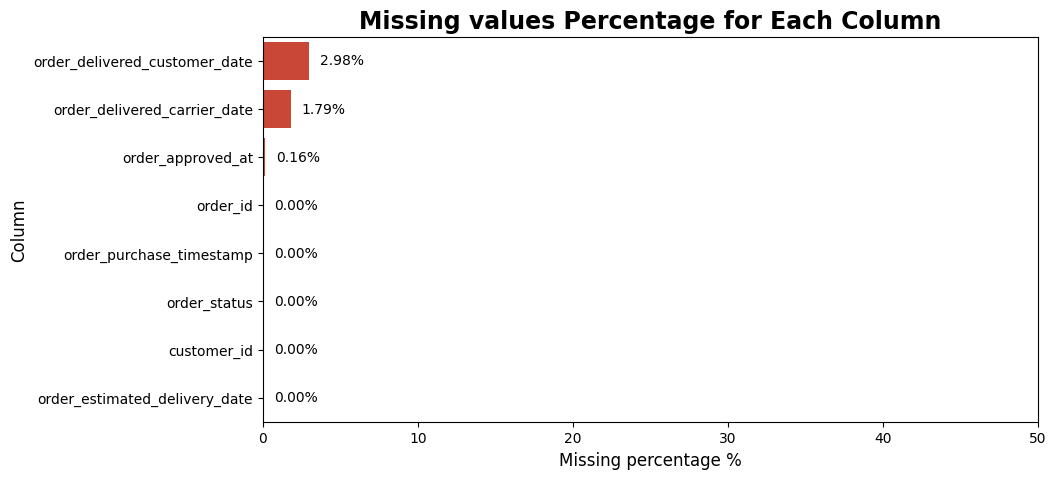

In [64]:
# Plot the missing values
missing_percentage = pmv(orders_df)

In [65]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,2016-10-07 13:17:15,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13,2016-10-07 13:16:46,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,NaT,2016-10-25


In [66]:
# First three "order_delivered_customer_date" values are empty. So, we will drop them before using ffll() method
orders_df.drop(orders_df.index[:3], inplace=True)

In [67]:
# Check the head of the dataset
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,NaT,2016-10-25
6747,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14,2016-11-23
28424,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27,2016-11-07
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08,2016-11-25


In [68]:
# Substitute the missing values with the previous values (forward fill):
orders_df["order_delivered_customer_date"] = orders_df[
    "order_delivered_customer_date"
].ffill()

# Check the missing values again
print("Missing values: ", orders_df["order_delivered_customer_date"].isnull().sum())

Missing values:  0


In [69]:
# A column with ordinal order dates will also be included. This numerical format will ease further tasks.
# Adding a column with ordinal order dates
orders_df["date_ordinal"] = orders_df["order_purchase_timestamp"].apply(
    lambda date: date.toordinal()
)

Note!
These delivery time values may be useful:

- Difference between estimated delivery date and true delivery date (shipping_time_delta)
- Difference between order date and delivery date (shipping_duration)
- Difference between order date and estimated delivery date (estimated_duration)


In [70]:
# Convert columns to date time
orders_df["order_estimated_delivery_date"] = pd.to_datetime(
    orders_df["order_estimated_delivery_date"]
)
orders_df["order_delivered_customer_date"] = pd.to_datetime(
    orders_df["order_delivered_customer_date"]
)
orders_df["order_purchase_timestamp"] = pd.to_datetime(
    orders_df["order_purchase_timestamp"]
)


# Create shipping time column, which is the difference between the order estimated delivery date and the order delivered customer date
orders_df["shipping_time"] = (
    orders_df["order_estimated_delivery_date"]
    - orders_df["order_delivered_customer_date"]
)

# Create shipping duration column, which is the difference between the order delivered customer date and the order purchase timestamp
orders_df["shipping_duration"] = (
    orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
)

# Create estimated duration column, which is the difference between the order estimated delivery date and the order purchase timestamp
orders_df["estimated_duration"] = (
    orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
)

In [71]:
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_ordinal,shipping_time,shipping_duration,estimated_duration
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04,736222,-36 days,55 days,19 days
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,2016-11-09,2016-10-25,736239,-15 days,38 days,23 days
6747,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14,2016-11-23,736240,40 days,11 days,51 days
28424,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27,2016-11-07,736240,11 days,24 days,35 days
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08,2016-11-25,736240,17 days,36 days,53 days
62143,ae8a60e4b03c5a4ba9ca0672c164b181,e6f959bf384d1d53b6d68826699bba12,delivered,2016-10-03,2016-10-04 10:28:25,2016-10-30 14:22:04,2016-11-03,2016-12-01,736240,28 days,31 days,59 days
97979,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03,2016-11-29,736240,26 days,31 days,57 days
93285,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26,2016-10-27,736240,1 days,23 days,24 days
33504,ef1b29b591d31d57c0d7337460dd83c9,dc607dc98d6a11d5d04d9f2a70aa6c34,delivered,2016-10-03,2016-10-04 10:28:19,2016-10-21 14:23:36,2016-11-01,2016-11-25,736240,24 days,29 days,53 days
88472,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31,2016-11-23,736240,23 days,28 days,51 days


In [72]:
# Check if there are repeating orders
print(f"Number of unique orders: {orders_df['order_id'].nunique()}")
print(f"Number of records: {orders_df.shape[0]}")

Number of unique orders: 99438
Number of records: 99438


### Cleaning the order items table


#### Handling format data type


In [73]:
# Change the order_item_id attribute to string
order_items_df["order_item_id"] = order_items_df["order_item_id"].astype(str)

# Check the data type of the order_item_id attribute
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  object 
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.0+ MB


#### Handling Outliers


In [74]:
# Check the statistics of the price attribute before removing outliers
order_items_df["price"].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

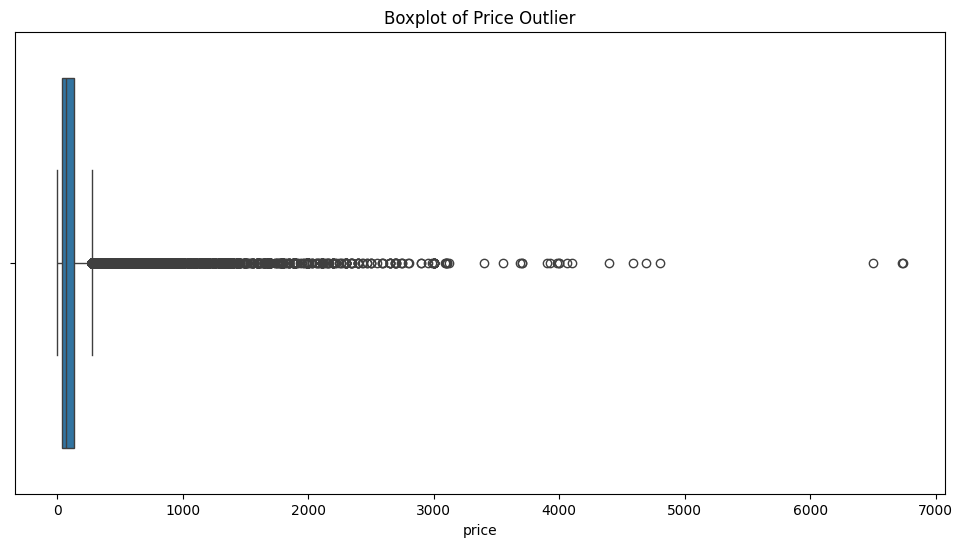

In [75]:
# Plot a boxplot to visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items_df["price"])
plt.title("Boxplot of Price Outlier")
plt.show()

In [76]:
# Handling outliers of the price attribute

# Calculate Q1, Q3 and IQR
Q1 = order_items_df["price"].quantile(0.25)
Q3 = order_items_df["price"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'price' outside the acceptable range
order_items_df = order_items_df[
    (order_items_df["price"] >= lower_bound) & (order_items_df["price"] <= upper_bound)
]

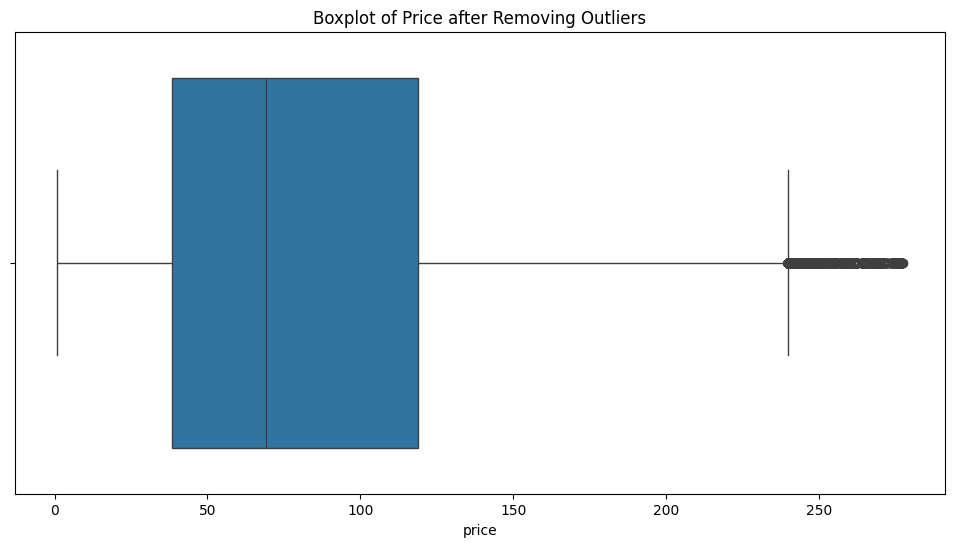

In [77]:
# Check the boxplot of the price attribute after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items_df["price"])
plt.title("Boxplot of Price after Removing Outliers")
plt.show()

In [78]:
# Check the statistics of the price attribute after removing outliers
order_items_df["price"].describe()

count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64

In [79]:
# Check the statistics of the freight_value attribute before removing outliers
order_items_df["freight_value"].describe()

count    104223.000000
mean         18.558853
std          12.049322
min           0.000000
25%          12.790000
50%          16.010000
75%          19.840000
max         299.160000
Name: freight_value, dtype: float64

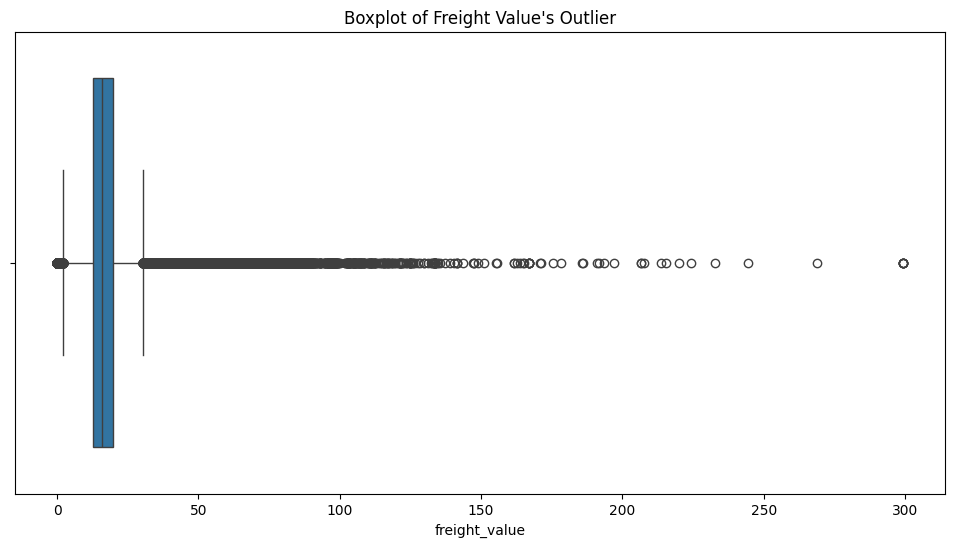

In [80]:
# Plot a boxplot to visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items_df["freight_value"])
plt.title("Boxplot of Freight Value's Outlier")
plt.show()

In [81]:
# Handling outliers of the freight_value attribute

# Handling outliers of the freight_value attribute

# Calculate Q1, Q3 and IQR
Q1 = order_items_df["freight_value"].quantile(0.25)
Q3 = order_items_df["freight_value"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'freight_value' outside the acceptable range
order_items_df = order_items_df[
    (order_items_df["freight_value"] >= lower_bound)
    & (order_items_df["freight_value"] <= upper_bound)
]

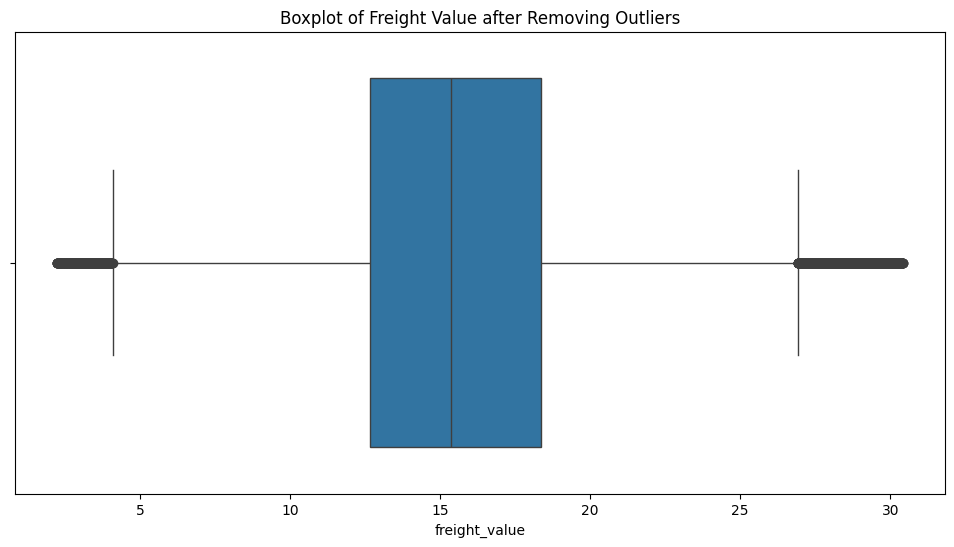

In [82]:
# Check the boxplot of the freight_value attribute after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items_df["freight_value"])
plt.title("Boxplot of Freight Value after Removing Outliers")
plt.show()

In [83]:
# Check the statistics of the freight_value attribute after removing outliers
order_items_df["freight_value"].describe()

count    93975.000000
mean        15.751864
std          5.113773
min          2.240000
25%         12.660000
50%         15.350000
75%         18.370000
max         30.410000
Name: freight_value, dtype: float64

#### Transform the order_item_id into qty to extract unit-per-order line profile


In [84]:
order_items_consolidated_df = (
    order_items_df.groupby(by=["product_id", "order_id"])
    .agg(
        {
            "order_item_id": "count",
            "seller_id": "first",
            "shipping_limit_date": "first",
            "price": "first",
            "freight_value": "first",
        }
    )
    .reset_index()
)

order_items_consolidated_df

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60
...,...,...,...,...,...,...,...
85049,fffdb2d0ec8d6a61f0a0a0db3f25b441,2878b4e373a9556df9aa1708a4e5c3c8,1,9f505651f4a6abe901a56cdc21508025,2018-08-09 16:55:38,34.99,7.51
85050,fffdb2d0ec8d6a61f0a0a0db3f25b441,a8159270bc9cf7d54450e079ba6b7232,1,9f505651f4a6abe901a56cdc21508025,2018-04-09 05:35:27,29.99,18.23
85051,fffdb2d0ec8d6a61f0a0a0db3f25b441,beaf95465b542dea76df78b2fb86a97a,1,9f505651f4a6abe901a56cdc21508025,2018-04-25 10:30:35,34.99,18.23
85052,fffdb2d0ec8d6a61f0a0a0db3f25b441,d6c1ed12e8eeaa15e9d5c83c79598f85,1,9f505651f4a6abe901a56cdc21508025,2018-08-14 17:25:18,34.99,7.51


In [85]:
# Checking is there any info was lost
print(f"Orders in new table: {order_items_consolidated_df['order_id'].nunique()}")
print(f"Orders in old table: {order_items_df['order_id'].nunique()}")
print(f"SKUs in new table: {order_items_consolidated_df['product_id'].nunique()}")
print(f"SKUs in old table: {order_items_df['product_id'].nunique()}")
print(
    f"Total quantity in new table: {order_items_consolidated_df['order_item_id'].sum()}"
)
print(f"Total quantity in old table: {len(order_items_df['order_item_id'])}")

Orders in new table: 82186
Orders in old table: 82186
SKUs in new table: 27336
SKUs in old table: 27336
Total quantity in new table: 93975
Total quantity in old table: 93975


In [86]:
# Renaming the order_item_id column to quantity
order_items_consolidated_df.rename(columns={"order_item_id": "qty"}, inplace=True)
order_items_consolidated_df

,product_id,order_id,qty,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60
...,...,...,...,...,...,...,...
85049,fffdb2d0ec8d6a61f0a0a0db3f25b441,2878b4e373a9556df9aa1708a4e5c3c8,1,9f505651f4a6abe901a56cdc21508025,2018-08-09 16:55:38,34.99,7.51
85050,fffdb2d0ec8d6a61f0a0a0db3f25b441,a8159270bc9cf7d54450e079ba6b7232,1,9f505651f4a6abe901a56cdc21508025,2018-04-09 05:35:27,29.99,18.23
85051,fffdb2d0ec8d6a61f0a0a0db3f25b441,beaf95465b542dea76df78b2fb86a97a,1,9f505651f4a6abe901a56cdc21508025,2018-04-25 10:30:35,34.99,18.23
85052,fffdb2d0ec8d6a61f0a0a0db3f25b441,d6c1ed12e8eeaa15e9d5c83c79598f85,1,9f505651f4a6abe901a56cdc21508025,2018-08-14 17:25:18,34.99,7.51


### Cleaning the order payment table


#### Handling Outliers


In [87]:
# Check the statistics of the payment_value attribute before removing outliers
order_payments_df["payment_value"].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

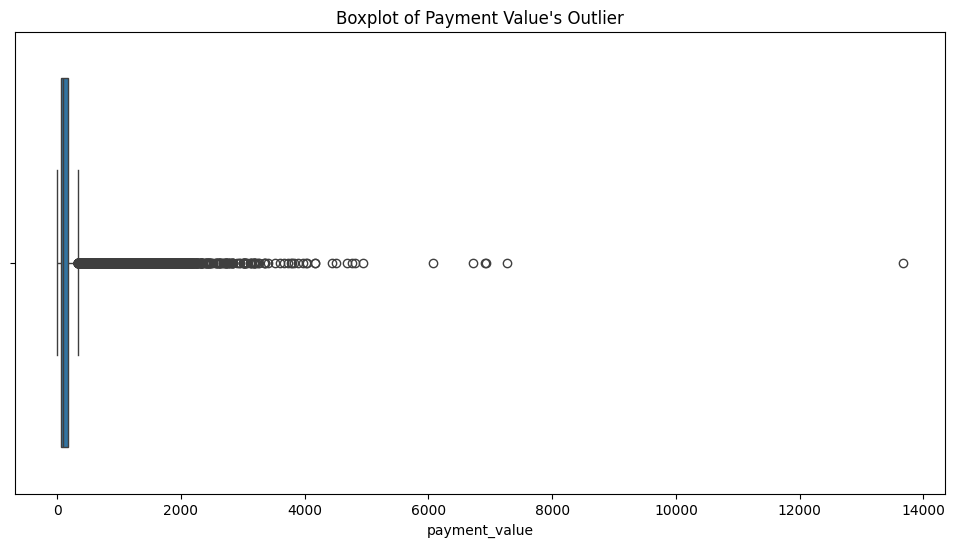

In [88]:
# Plot a boxplot to visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_payments_df["payment_value"])
plt.title("Boxplot of Payment Value's Outlier")
plt.show()

In [89]:
# Handling outliers of the payment_value attribute

# Handling outliers of the payment_value attribute

# Calculate Q1, Q3 and IQR
Q1 = order_payments_df["payment_value"].quantile(0.25)
Q3 = order_payments_df["payment_value"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'payment_value' outside the acceptable range
order_payments_df = order_payments_df[
    (order_payments_df["payment_value"] >= lower_bound)
    & (order_payments_df["payment_value"] <= upper_bound)
]

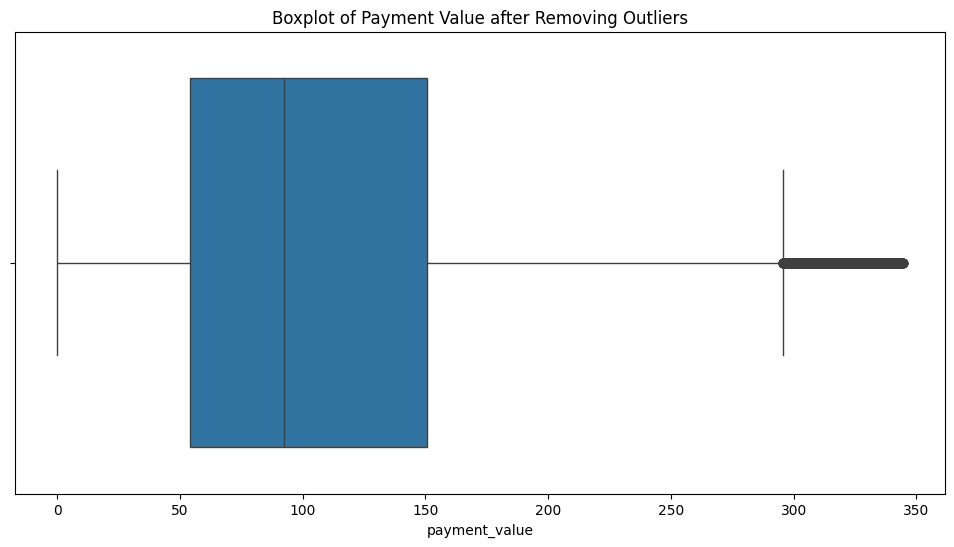

In [90]:
# Plot a boxplot of the payment_value attribute after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_payments_df["payment_value"])
plt.title("Boxplot of Payment Value after Removing Outliers")
plt.show()

In [91]:
# Check the statistics of the freight_value attribute after removing outliers
order_payments_df["payment_value"].describe()

count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

### Cleaning the order reviews table


#### Handling format data type


In [92]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [93]:
# Change the review_creation_date attribute to datetime
order_reviews_df["review_creation_date"] = pd.to_datetime(
    order_reviews_df["review_creation_date"]
)

# Change the review_answer_timestamp attribute to datetime
order_reviews_df["review_answer_timestamp"] = pd.to_datetime(
    order_reviews_df["review_answer_timestamp"]
)

# Check the data type of the attributes
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [94]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


#### Handling missing value


In [95]:
# Backup the dataset order_reviews_df
order_reviews_cleaned_df = order_reviews_df.copy()

In [96]:
order_reviews_cleaned_df.isnull().sum().sort_values(ascending=False)

review_comment_title       87656
review_comment_message     58247
review_id                      0
review_score                   0
order_id                       0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [97]:
# Fill the missing values in review_comment_title with "No comment"
order_reviews_cleaned_df["review_comment_title"].fillna("No comment", inplace=True)

# Fill the missing values in review_comment_message with "No comment"
order_reviews_cleaned_df["review_comment_message"].fillna("No comment", inplace=True)

# Check the missing values again
print(f"Missing values: {order_reviews_cleaned_df.isnull().sum().sum()}")

Missing values: 0


C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\3157499179.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_cleaned_df["review_comment_title"].fillna("No comment", inplace=True)
C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\3157499179.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [98]:
# Merge the dataframes order_reviews that filled the missing values with the missing values of the original dataframe
order_reviews_df = pd.merge(
    order_reviews_cleaned_df, order_reviews_df, how="left"
).copy()
order_reviews_cleaned_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No comment,No comment,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No comment,No comment,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No comment,No comment,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No comment,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


### Cleaning the products table


#### Handling the incorrect attributes name


In [99]:
# Change the product_name_lenght attribute to product_name_length
products_df.rename(columns={"product_name_lenght": "product_name_length"}, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [100]:
# Change the product_name_lenght attribute to product_name_length
products_df.rename(
    columns={"product_description_lenght": "product_description_length"}, inplace=True
)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Handling missing value


In [101]:
products_df.isnull().sum().sort_values(ascending=False)

product_category_name         610
product_description_length    610
product_name_length           610
product_photos_qty            610
product_weight_g                2
product_height_cm               2
product_length_cm               2
product_width_cm                2
product_id                      0
dtype: int64

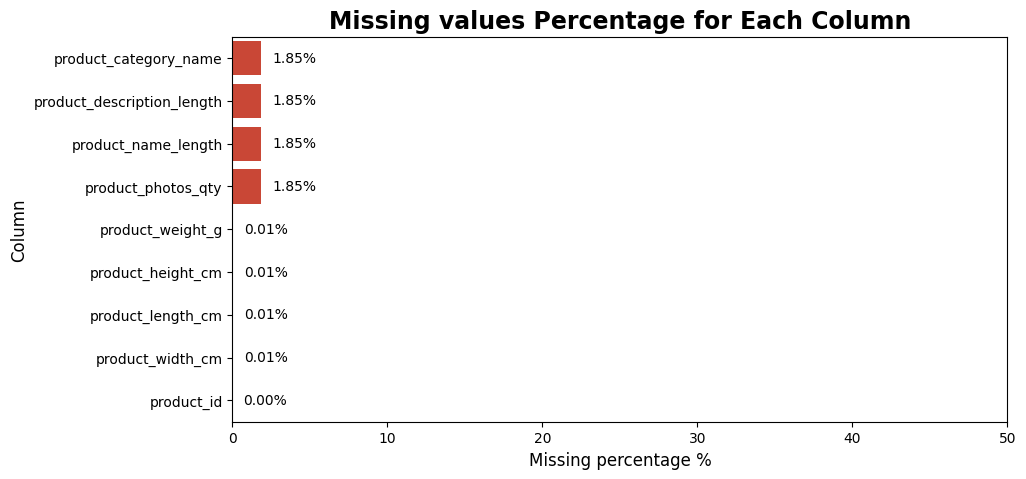

In [102]:
# Plot the missing values for each column
missing_percentage = pmv(products_df)

In [103]:
# Check the unique values of the product_category_name attribute
print(f"Number of unique values:\n {products_df['product_category_name'].unique()}")

Number of unique values:
 ['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' nan 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'fashion_roupa_masculina'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'telefonia_fixa'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'eletrodomesticos_2' 'artigos_de_festas' 'bebidas' 'market_p

In [104]:
print(
    f"Frequency of each value in product_category_name attribute:\n {products_df['product_category_name'].value_counts()}"
)

Frequency of each value in product_category_name attribute:
 product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64


In [105]:
# Find the mode of the product_category_name attribute
mode_pcn = products_df["product_category_name"].mode()[0]

# Fill the missing values in product_category_name with the mode
products_df["product_category_name"].fillna(mode_pcn, inplace=True)

C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\2207720554.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_category_name"].fillna(mode_pcn, inplace=True)


<Axes: xlabel='product_name_length', ylabel='Count'>

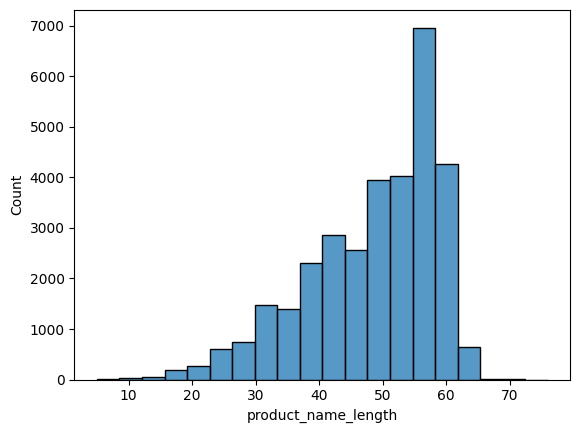

In [106]:
# Plot the distribution values of the product_name_length attribute
sns.histplot(data=products_df, x="product_name_length", bins=20)

<Axes: xlabel='product_description_length', ylabel='Count'>

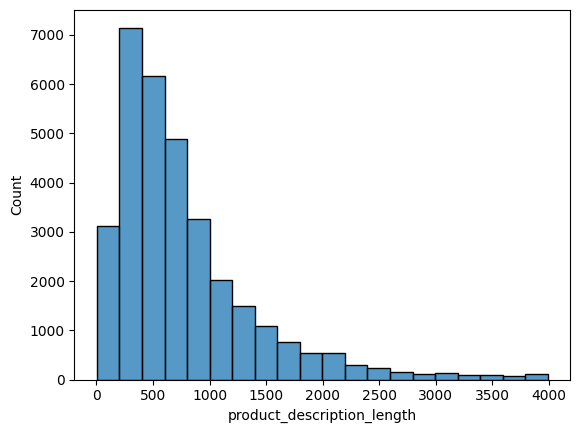

In [107]:
# Plot the distribution values of the product_description_length attribute
sns.histplot(data=products_df, x="product_description_length", bins=20)

<Axes: xlabel='product_photos_qty', ylabel='Count'>

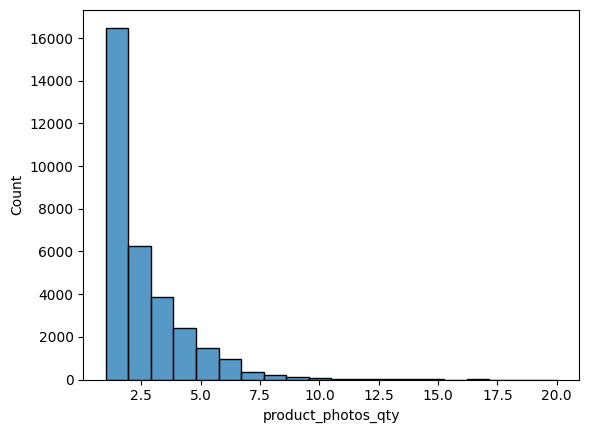

In [108]:
# Plot the distribution values of the product_photos_qty attribute
sns.histplot(data=products_df, x="product_photos_qty", bins=20)

<Axes: xlabel='product_weight_g', ylabel='Count'>

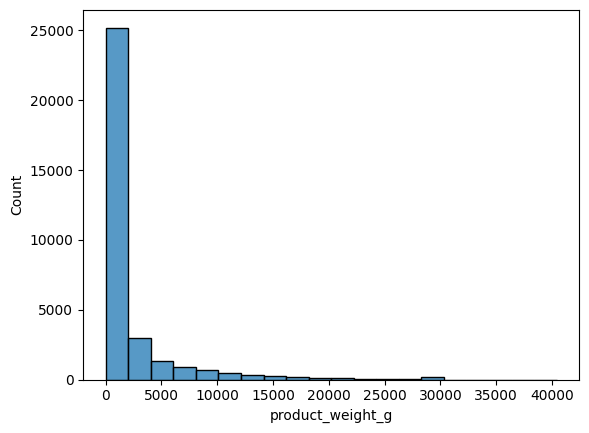

In [109]:
# Plot the distribution values of the product_weight_g attribute
sns.histplot(data=products_df, x="product_weight_g", bins=20)

<Axes: xlabel='product_length_cm', ylabel='Count'>

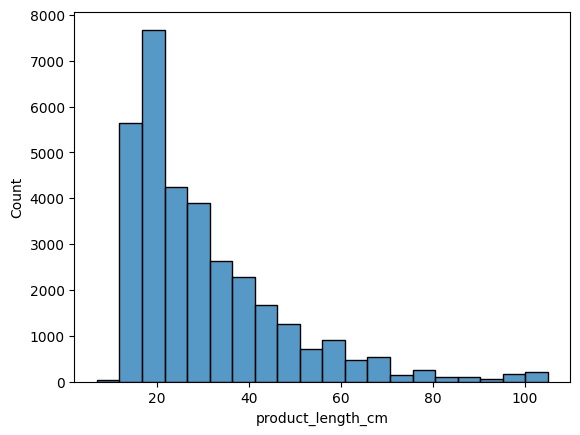

In [110]:
# Plot the distribution values of the product_length_cm attribute
sns.histplot(data=products_df, x="product_length_cm", bins=20)

<Axes: xlabel='product_height_cm', ylabel='Count'>

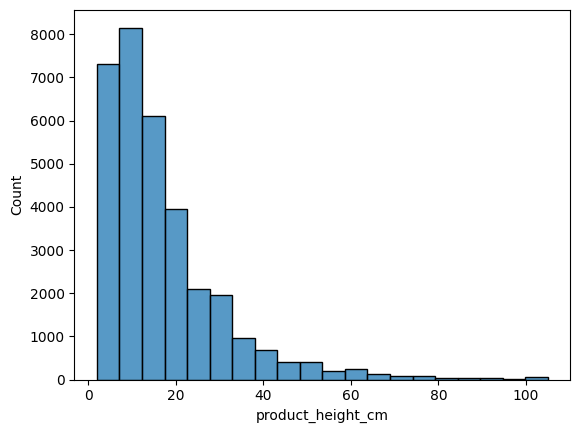

In [111]:
# Plot the distribution values of the product_height_cm attribute
sns.histplot(data=products_df, x="product_height_cm", bins=20)

<Axes: xlabel='product_width_cm', ylabel='Count'>

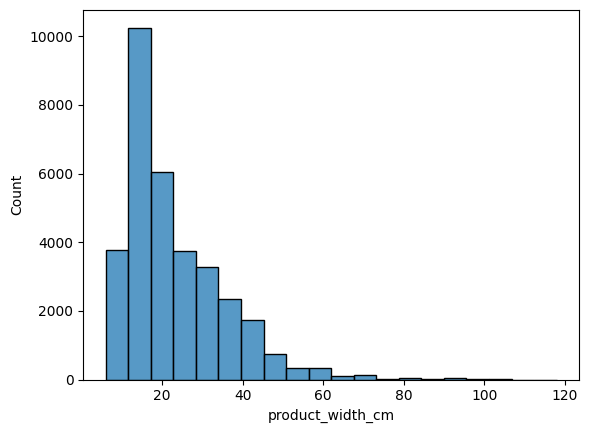

In [112]:
# Plot the distribution values of the product_width_cm attribute
sns.histplot(data=products_df, x="product_width_cm", bins=20)

In [113]:
"""
Find the median values for the following attributes:
- product_name_length
- product_description_length
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm
"""
median_pnl = products_df["product_name_length"].median()
median_pdl = products_df["product_description_length"].median()
median_ppq = products_df["product_photos_qty"].median()
median_pw = products_df["product_weight_g"].median()
median_pl = products_df["product_length_cm"].median()
median_ph = products_df["product_height_cm"].median()
median_pw = products_df["product_width_cm"].median()

# Fill the missing values with the median

products_df["product_name_length"].fillna(median_pnl, inplace=True)
products_df["product_description_length"].fillna(median_pdl, inplace=True)
products_df["product_photos_qty"].fillna(median_ppq, inplace=True)
products_df["product_weight_g"].fillna(median_pw, inplace=True)
products_df["product_length_cm"].fillna(median_pl, inplace=True)
products_df["product_height_cm"].fillna(median_ph, inplace=True)
products_df["product_width_cm"].fillna(median_pw, inplace=True)

C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\3937937661.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_name_length"].fillna(median_pnl, inplace=True)
C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\3937937661.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [114]:
# Check the missing values again
print(f"Missing values: {products_df.isnull().sum().sum()}")

Missing values: 0


#### Handling format data type


In [115]:
# Change the datatype of the product_name_length attribute to int
products_df["product_name_length"] = products_df["product_name_length"].astype(int)

# Change the datatype of the product_description_length attribute to int
products_df["product_description_length"] = products_df[
    "product_description_length"
].astype(int)

# Change the datatype of the product_photos_qty attribute to int
products_df["product_photos_qty"] = products_df["product_photos_qty"].astype(int)

# Change the datatype of the product_weight_g attribute to int
products_df["product_weight_g"] = products_df["product_weight_g"].astype(int)

# Change the datatype of the product_length_cm attribute to int
products_df["product_length_cm"] = products_df["product_length_cm"].astype(int)

# Change the datatype of the product_height_cm attribute to int
products_df["product_height_cm"] = products_df["product_height_cm"].astype(int)

# Change the datatype of the product_width_cm attribute to int
products_df["product_width_cm"] = products_df["product_width_cm"].astype(int)

In [116]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


### Cleaning the sellers table


#### Handling format data type


In [117]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [118]:
# Change the seller_zip_code_prefix attribute to string
sellers_df["seller_zip_code_prefix"] = sellers_df["seller_zip_code_prefix"].astype(str)

# Check the data type of the seller_zip_code_prefix attribute
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


### Cleaning the geolocation table


#### Handling format data type


In [119]:
# Change the geolocation_zip_code_prefix attribute to string
geolocation_df["geolocation_zip_code_prefix"] = geolocation_df[
    "geolocation_zip_code_prefix"
].astype(str)

# Check the data type of the geolocation_zip_code_prefix attribute
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


#### Handling the data duplication


In [120]:
# Drop the duplicate values in the geolocation_df
geolocation_df.drop_duplicates(
    subset=["geolocation_zip_code_prefix"], keep="first", inplace=True
)

# Check the duplicate values in the geolocation_df
duplicate_value = geolocation_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


#### Handling Inconsistent Values


In [121]:
# Check unique data in attribute geolocation_city
print(f"Number of unique values:\n {geolocation_df['geolocation_city'].unique()}")

Number of unique values:
 ['sao paulo' 'são paulo' 'osasco' ... 'floriano peixoto' 'erebango'
 'santa cecilia do sul']


In [122]:
# Check the frequency of each value in attribute geolocation_city
geolocation_df.groupby(by=["geolocation_city", "geolocation_zip_code_prefix"]).agg(
    {"geolocation_city": "count"}
)

,,geolocation_city
geolocation_city,geolocation_zip_code_prefix,
abadia de goias,75345,1
abadia dos dourados,38540,1
abadiania,72940,1
abaete,35620,1
abaetetuba,68440,1
...,...,...
águas lindas de goiás,72927,1
álvaro de carvalho,17410,1
ângulo,86755,1


In [123]:
geolocation_df.groupby(by=["geolocation_city", "geolocation_zip_code_prefix"]).agg(
    {"geolocation_city": "nunique"}
)

,,geolocation_city
geolocation_city,geolocation_zip_code_prefix,
abadia de goias,75345,1
abadia dos dourados,38540,1
abadiania,72940,1
abaete,35620,1
abaetetuba,68440,1
...,...,...
águas lindas de goiás,72927,1
álvaro de carvalho,17410,1
ângulo,86755,1


In [124]:
# Data homogenization
geolocation_df.geolocation_city = geolocation_df.geolocation_city.apply(
    lambda x: "abadiânia" if x == "abadiania" else x
)
geolocation_df.geolocation_city = geolocation_df.geolocation_city.apply(
    lambda x: "abaeté" if x == "abaete" else x
)
geolocation_df.geolocation_city = geolocation_df.geolocation_city.apply(
    lambda x: "abaré" if x == "abare" else x
)
geolocation_df.geolocation_city = geolocation_df.geolocation_city.apply(
    lambda x: "abatiá" if x == "abatia" else x
)
geolocation_df.geolocation_city = geolocation_df.geolocation_city.apply(
    lambda x: "são paulo" if x == "sao paulo" else x
)
geolocation_df.geolocation_city = geolocation_df.geolocation_city.apply(
    lambda x: "cidade gaúcha" if x == "cidade" else x
)
geolocation_df.geolocation_city = geolocation_df.geolocation_city.apply(
    lambda x: "arraial do cabo" if x == "...arraial do cabo" else x
)
geolocation_df.geolocation_city = geolocation_df.geolocation_city.apply(
    lambda x: "quarto centenário" if x == "4o. centenario" else x
)
geolocation_df.geolocation_city = geolocation_df.geolocation_city.apply(
    lambda x: "quarto centenário" if x == "4º centenario" else x
)
geolocation_df.geolocation_city = geolocation_df.geolocation_city.apply(
    lambda x: "quarto centenário" if x == "quarto centenario" else x
)

In [125]:
geolocation_df.geolocation_city.unique()

array(['são paulo', 'osasco', 'carapicuíba', ..., 'floriano peixoto',
       'erebango', 'santa cecilia do sul'], shape=(5954,), dtype=object)

### Merging datasets


#### Merging the table orders and order items


In [126]:
# Combine the table orders and order items
sales_df = orders_df.merge(order_items_consolidated_df, on="order_id")

In [127]:
# Check the summary of the dataset and its columns
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85053 entries, 0 to 85052
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85053 non-null  object         
 1   customer_id                    85053 non-null  object         
 2   order_status                   85053 non-null  object         
 3   order_purchase_timestamp       85053 non-null  datetime64[ns] 
 4   order_approved_at              85041 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84273 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85053 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85053 non-null  datetime64[ns] 
 8   date_ordinal                   85053 non-null  int64          
 9   shipping_time                  85053 non-null  timedelta64[ns]
 10  shipping_duration              85053 non-null  timedelta64[ns]
 11  es

In [128]:
# Check the statistics of the dataset
sales_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_ordinal,shipping_time,shipping_duration,estimated_duration,qty,price,freight_value
count,85053,85041,84273,85053,85053,85053.000000,85053,85053,85053,85053.000000,85053.000000,85053.000000
mean,2017-12-29 03:03:31.675073536,2017-12-30 05:31:05.324408320,2018-01-02 12:29:56.519715584,2018-01-09 23:46:44.599484928,2018-01-21 20:33:38.976403200,736692.127450,11 days 20:46:54.376917921,11 days 20:43:12.924411837,23 days 17:30:07.301329759,1.104888,80.878882,15.795547
min,2016-09-15 00:00:00,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 00:00:00,2016-10-04 00:00:00,736222.000000,-188 days +00:00:00,-4 days +00:00:00,3 days 00:00:00,1.000000,0.850000,2.240000
25%,2017-09-10 00:00:00,2017-09-11 15:44:03,2017-09-13 21:39:45,2017-09-20 00:00:00,2017-09-29 00:00:00,736582.000000,7 days 00:00:00,6 days 00:00:00,18 days 00:00:00,1.000000,37.200000,12.690000
50%,2018-01-17 00:00:00,2018-01-17 14:30:02,2018-01-20 02:18:54,2018-01-30 00:00:00,2018-02-09 00:00:00,736711.000000,12 days 00:00:00,10 days 00:00:00,23 days 00:00:00,1.000000,65.000000,15.380000
75%,2018-05-02 00:00:00,2018-05-03 04:13:09,2018-05-04 15:47:00,2018-05-11 00:00:00,2018-05-24 00:00:00,736816.000000,17 days 00:00:00,15 days 00:00:00,28 days 00:00:00,1.000000,110.000000,18.400000
max,2018-09-03 00:00:00,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 00:00:00,2018-10-23 00:00:00,736940.000000,147 days 00:00:00,210 days 00:00:00,156 days 00:00:00,20.000000,277.000000,30.410000
std,NaN,NaN,NaN,NaN,NaN,153.530253,9 days 23:22:50.772495760,9 days 02:07:34.708221697,8 days 12:25:00.024322393,0.464658,56.424319,5.098170


#### Merging the products table with the order_with_items table


In [129]:
# Combine the table orders_with_items and order payments
sales_df = sales_df.merge(products_df, on="product_id")
sales_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_ordinal,shipping_time,...,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04,736222,-36 days,...,44.99,2.83,beleza_saude,34,1036,1,1000,16,16,16
1,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,2016-11-09,2016-10-25,736239,-15 days,...,100.00,9.34,bebes,32,561,1,500,18,18,18
2,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14,2016-11-23,736240,40 days,...,29.99,10.96,fashion_calcados,56,459,2,9000,16,5,33
3,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27,2016-11-07,736240,11 days,...,21.90,17.19,esporte_lazer,39,518,1,400,16,16,16
4,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08,2016-11-25,736240,17 days,...,21.50,14.11,esporte_lazer,25,823,1,476,17,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85048,d03ca98f59480e7e76c71fa83ecd8fb6,56b1ac2855cc6d7950b4ffa6a9b41b0d,delivered,2018-08-29,2018-08-29 11:24:02,2018-08-29 17:46:00,2018-08-30,2018-09-04,736935,5 days,...,109.90,9.52,alimentos,60,523,4,750,28,11,13
85049,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30,2018-09-03,736935,4 days,...,63.90,9.20,brinquedos,52,711,2,1500,28,22,18
85050,fb393211459aac00af932cd7ab4fa2cc,54365416b7ef5599f54a6c7821d5d290,delivered,2018-08-29,2018-08-29 09:25:12,2018-08-29 15:48:00,2018-08-30,2018-09-04,736935,5 days,...,99.00,7.95,relogios_presentes,46,531,6,300,16,2,20
85051,d70442bc5e3cb7438da497cc6a210f80,10a79ef2783cae3d8d678e85fde235ac,delivered,2018-08-29,2018-08-29 10:35:16,2018-08-29 19:57:00,2018-08-30,2018-09-04,736935,5 days,...,6.90,7.39,esporte_lazer,33,73,3,100,25,25,25


In [130]:
# Check the summary of the dataset and its columns
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85053 entries, 0 to 85052
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85053 non-null  object         
 1   customer_id                    85053 non-null  object         
 2   order_status                   85053 non-null  object         
 3   order_purchase_timestamp       85053 non-null  datetime64[ns] 
 4   order_approved_at              85041 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84273 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85053 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85053 non-null  datetime64[ns] 
 8   date_ordinal                   85053 non-null  int64          
 9   shipping_time                  85053 non-null  timedelta64[ns]
 10  shipping_duration              85053 non-null  timedelta64[ns]
 11  es

In [131]:
# Check the statistics of the dataset
sales_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,85053,2017-12-29 03:03:31.675073536,2016-09-15 00:00:00,2017-09-10 00:00:00,2018-01-17 00:00:00,2018-05-02 00:00:00,2018-09-03 00:00:00,NaN
order_approved_at,85041,2017-12-30 05:31:05.324408320,2016-09-15 12:16:38,2017-09-11 15:44:03,2018-01-17 14:30:02,2018-05-03 04:13:09,2018-09-03 17:40:06,NaN
order_delivered_carrier_date,84273,2018-01-02 12:29:56.519715584,2016-10-08 10:34:01,2017-09-13 21:39:45,2018-01-20 02:18:54,2018-05-04 15:47:00,2018-09-11 19:48:28,NaN
order_delivered_customer_date,85053,2018-01-09 23:46:44.599484928,2016-10-11 00:00:00,2017-09-20 00:00:00,2018-01-30 00:00:00,2018-05-11 00:00:00,2018-10-17 00:00:00,NaN
order_estimated_delivery_date,85053,2018-01-21 20:33:38.976403200,2016-10-04 00:00:00,2017-09-29 00:00:00,2018-02-09 00:00:00,2018-05-24 00:00:00,2018-10-23 00:00:00,NaN
date_ordinal,85053.0,736692.12745,736222.0,736582.0,736711.0,736816.0,736940.0,153.530253
shipping_time,85053,11 days 20:46:54.376917921,-188 days +00:00:00,7 days 00:00:00,12 days 00:00:00,17 days 00:00:00,147 days 00:00:00,9 days 23:22:50.772495760
shipping_duration,85053,11 days 20:43:12.924411837,-4 days +00:00:00,6 days 00:00:00,10 days 00:00:00,15 days 00:00:00,210 days 00:00:00,9 days 02:07:34.708221697
estimated_duration,85053,23 days 17:30:07.301329759,3 days 00:00:00,18 days 00:00:00,23 days 00:00:00,28 days 00:00:00,156 days 00:00:00,8 days 12:25:00.024322393
qty,85053.0,1.104888,1.0,1.0,1.0,1.0,20.0,0.464658


#### Merging the sales table with the product category name table


In [132]:
# Combine the table sales and product category name
sales_df = sales_df.merge(product_category_name_df, on="product_category_name")
sales_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_ordinal,shipping_time,...,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04,736222,-36 days,...,2.83,beleza_saude,34,1036,1,1000,16,16,16,health_beauty
1,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,2016-11-09,2016-10-25,736239,-15 days,...,9.34,bebes,32,561,1,500,18,18,18,baby
2,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14,2016-11-23,736240,40 days,...,10.96,fashion_calcados,56,459,2,9000,16,5,33,fashion_shoes
3,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27,2016-11-07,736240,11 days,...,17.19,esporte_lazer,39,518,1,400,16,16,16,sports_leisure
4,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08,2016-11-25,736240,17 days,...,14.11,esporte_lazer,25,823,1,476,17,14,14,sports_leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85030,d03ca98f59480e7e76c71fa83ecd8fb6,56b1ac2855cc6d7950b4ffa6a9b41b0d,delivered,2018-08-29,2018-08-29 11:24:02,2018-08-29 17:46:00,2018-08-30,2018-09-04,736935,5 days,...,9.52,alimentos,60,523,4,750,28,11,13,food
85031,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30,2018-09-03,736935,4 days,...,9.20,brinquedos,52,711,2,1500,28,22,18,toys
85032,fb393211459aac00af932cd7ab4fa2cc,54365416b7ef5599f54a6c7821d5d290,delivered,2018-08-29,2018-08-29 09:25:12,2018-08-29 15:48:00,2018-08-30,2018-09-04,736935,5 days,...,7.95,relogios_presentes,46,531,6,300,16,2,20,watches_gifts
85033,d70442bc5e3cb7438da497cc6a210f80,10a79ef2783cae3d8d678e85fde235ac,delivered,2018-08-29,2018-08-29 10:35:16,2018-08-29 19:57:00,2018-08-30,2018-09-04,736935,5 days,...,7.39,esporte_lazer,33,73,3,100,25,25,25,sports_leisure


In [133]:
# Check the summary of the dataset and its columns
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85035 entries, 0 to 85034
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85035 non-null  object         
 1   customer_id                    85035 non-null  object         
 2   order_status                   85035 non-null  object         
 3   order_purchase_timestamp       85035 non-null  datetime64[ns] 
 4   order_approved_at              85023 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84257 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85035 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85035 non-null  datetime64[ns] 
 8   date_ordinal                   85035 non-null  int64          
 9   shipping_time                  85035 non-null  timedelta64[ns]
 10  shipping_duration              85035 non-null  timedelta64[ns]
 11  es

## Exploratory Data Analysis (EDA)


#### Order Analysis


In [134]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85035 entries, 0 to 85034
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85035 non-null  object         
 1   customer_id                    85035 non-null  object         
 2   order_status                   85035 non-null  object         
 3   order_purchase_timestamp       85035 non-null  datetime64[ns] 
 4   order_approved_at              85023 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84257 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85035 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85035 non-null  datetime64[ns] 
 8   date_ordinal                   85035 non-null  int64          
 9   shipping_time                  85035 non-null  timedelta64[ns]
 10  shipping_duration              85035 non-null  timedelta64[ns]
 11  es

In [135]:
# Check the order delivery that is not delivered yet
sales_df[sales_df["order_delivered_carrier_date"].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_ordinal,shipping_time,...,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,2016-11-09,2016-10-25,736239,-15 days,...,9.34,bebes,32,561,1,500,18,18,18,baby
40,711b9be9c346d9ecdb9d38a5e1e7e39b,81e4aed5ab4253757305267b80712689,invoiced,2016-10-04,2016-10-04 14:08:38,NaT,2016-10-28,2016-11-24,736241,27 days,...,12.87,consoles_games,47,348,4,400,19,7,17,consoles_games
42,966f96af9d189dc428ff04ebbca821b8,90e1931af4fb878dbe45c79e6e458015,canceled,2016-10-04,2016-10-06 15:57:38,NaT,2016-10-31,2016-11-24,736241,24 days,...,12.44,brinquedos,40,1493,1,700,31,5,25,toys
49,dd359d3c294458c6d642b2eea9212bf5,5c58d1ea5a893380ecdd96dd6dfd5ec5,invoiced,2016-10-04,2016-10-05 03:08:27,NaT,2016-10-20,2016-11-24,736241,35 days,...,13.20,informatica_acessorios,36,398,1,900,28,18,14,computers_accessories
63,bfd31c6f76ff82a41e7beb05565aec4d,6c65055adfbc0007dbb4c5a22ea5ba8c,canceled,2016-10-04,2016-10-06 15:56:40,NaT,2016-11-03,2016-12-14,736241,41 days,...,12.29,telefonia,63,1548,3,400,18,16,16,telephony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82679,d67b79fea59821fda4d363d337a56c3a,f2bea5055b5b15b6b57d07408a1c454a,canceled,2018-08-14,2018-08-14 11:44:14,NaT,2018-08-16,2018-08-20,736920,4 days,...,9.17,moveis_decoracao,52,1786,2,600,68,8,13,furniture_decor
82997,00310b0c75bb13015ec4d82d341865a4,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15,2018-08-15 15:04:25,NaT,2018-08-17,2018-08-29,736921,12 days,...,15.38,utilidades_domesticas,58,1245,1,200,16,12,11,housewares
83243,a9491b6c990bc3b79967c5f058e46d8f,ef1615358c72dae1c068aedc495a13f3,canceled,2018-08-16,2018-08-16 13:23:58,NaT,2018-08-23,2018-08-24,736922,1 days,...,11.91,beleza_saude,60,851,1,2000,30,12,16,health_beauty
83525,acfa87544c19d596707d25cf2f7dab61,d5feeb223000c4c6dfdb7219b681e1d4,canceled,2018-08-17,2018-08-18 00:50:11,NaT,2018-08-27,2018-08-22,736923,-5 days,...,7.59,beleza_saude,52,572,1,300,17,14,14,health_beauty


In [136]:
# Check the distribution of each value in the order_status attribute
sales_df.groupby(by=("order_status")).size().reset_index(name="counts").sort_values(
    by="counts", ascending=False
)

,order_status,counts
2,delivered,83293
5,shipped,902
1,canceled,357
3,invoiced,253
4,processing,223
6,unavailable,5
0,approved,2


<Axes: title={'center': 'Distribution of Order Status'}, xlabel='Order Status', ylabel='Count'>

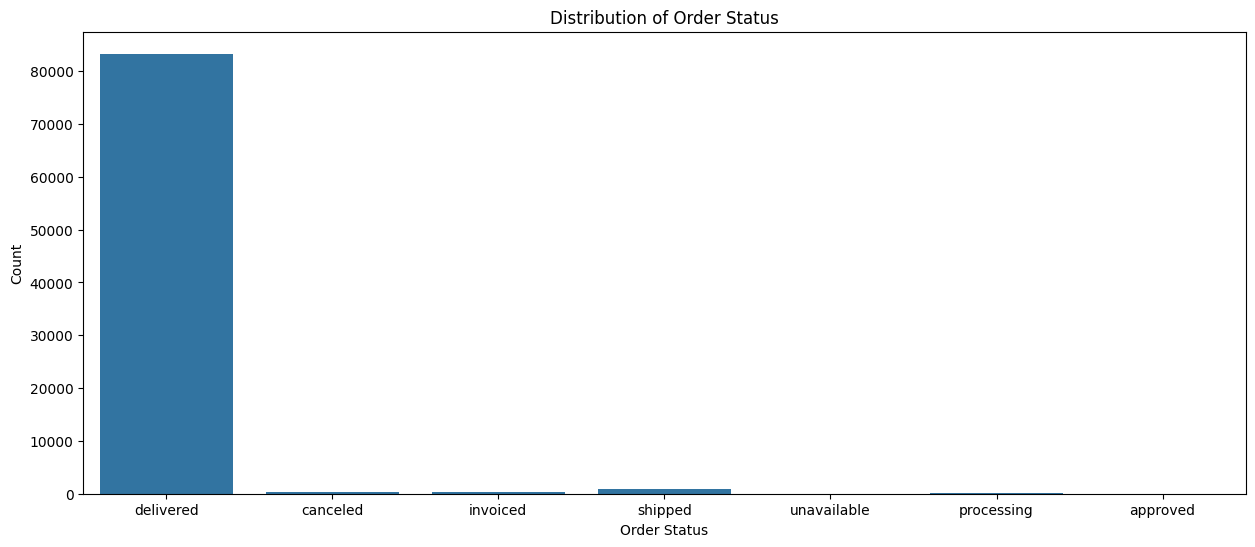

In [137]:
# Visualize the distribution of the order_status attribute
plt.figure(figsize=(15, 6))
plt.title("Distribution of Order Status")
plt.xlabel("Order Status")
plt.ylabel("Count")
sns.countplot(x="order_status", data=sales_df)

In [138]:
# Check how many orders are delivered on time based on the estimated delivery date
sales_df["on_time"] = np.where(
    sales_df["order_delivered_customer_date"]
    <= sales_df["order_estimated_delivery_date"],
    1,
    0,
)
sales_df["on_time"].value_counts()

on_time
1    79555
0     5480
Name: count, dtype: int64

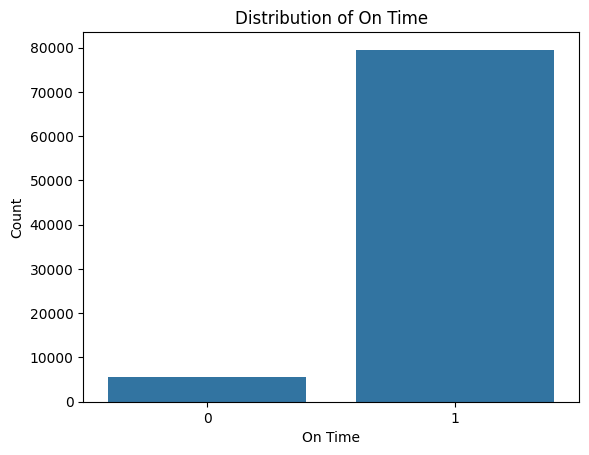

In [139]:
# Visualize the distribution of the on time attribute
sns.countplot(x="on_time", data=sales_df)
plt.title("Distribution of On Time")
plt.xlabel("On Time")
plt.ylabel("Count")
plt.show()

In [140]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85035 entries, 0 to 85034
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85035 non-null  object         
 1   customer_id                    85035 non-null  object         
 2   order_status                   85035 non-null  object         
 3   order_purchase_timestamp       85035 non-null  datetime64[ns] 
 4   order_approved_at              85023 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84257 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85035 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85035 non-null  datetime64[ns] 
 8   date_ordinal                   85035 non-null  int64          
 9   shipping_time                  85035 non-null  timedelta64[ns]
 10  shipping_duration              85035 non-null  timedelta64[ns]
 11  es

### Product Analysis


In [141]:
sales_df.describe(include="all").transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
order_id,85035,82168,77df84f9195be22a4e9cb72ca9e8b4c2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,85035,82168,1205480caca6c37f55954da838933b8a,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,85035,7,delivered,83293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_purchase_timestamp,85035,NaN,NaN,NaN,2017-12-29 02:31:13.346269440,2016-09-15 00:00:00,2017-09-10 00:00:00,2018-01-17 00:00:00,2018-05-02 00:00:00,2018-09-03 00:00:00,NaN
order_approved_at,85023,NaN,NaN,NaN,2017-12-30 04:58:44.117968384,2016-09-15 12:16:38,2017-09-11 15:37:15,2018-01-17 14:16:33,2018-05-03 04:12:51,2018-09-03 17:40:06,NaN
order_delivered_carrier_date,84257,NaN,NaN,NaN,2018-01-02 12:05:03.358130688,2016-10-08 10:34:01,2017-09-13 21:39:45,2018-01-20 01:38:47,2018-05-04 15:46:00,2018-09-11 19:48:28,NaN
order_delivered_customer_date,85035,NaN,NaN,NaN,2018-01-09 23:15:23.718468864,2016-10-11 00:00:00,2017-09-20 00:00:00,2018-01-30 00:00:00,2018-05-11 00:00:00,2018-10-17 00:00:00,NaN
order_estimated_delivery_date,85035,NaN,NaN,NaN,2018-01-21 20:03:11.525842432,2016-10-04 00:00:00,2017-09-29 00:00:00,2018-02-09 00:00:00,2018-05-24 00:00:00,2018-10-23 00:00:00,NaN
date_ordinal,85035.0,NaN,NaN,NaN,736692.105016,736222.0,736582.0,736711.0,736816.0,736940.0,153.515456
shipping_time,85035,NaN,NaN,NaN,11 days 20:47:47.807373434,-188 days +00:00:00,7 days 00:00:00,12 days 00:00:00,17 days 00:00:00,147 days 00:00:00,9 days 23:23:23.783489576


In [142]:
# Check the product category with the highest price
sales_df.groupby("product_category_name_english").agg({"price": "sum"}).sort_values(
    by="price", ascending=False
)

,price
product_category_name_english,
bed_bath_table,900771.86
health_beauty,594022.14
sports_leisure,590983.32
watches_gifts,510732.03
computers_accessories,505866.13
...,...
home_comfort_2,682.87
cds_dvds_musicals,575.00
fashion_childrens_clothes,569.85


In [143]:
# Check the product category with the lowest price
sales_df.groupby("product_category_name_english").agg({"price": "sum"}).sort_values(
    by="price", ascending=True
)

,price
product_category_name_english,
computers,34.50
security_and_services,283.29
fashion_childrens_clothes,569.85
cds_dvds_musicals,575.00
home_comfort_2,682.87
...,...
computers_accessories,505866.13
watches_gifts,510732.03
sports_leisure,590983.32


C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\1181668123.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: title={'center': 'Distribution of Price on Each Product Category'}, xlabel='Product Category', ylabel='Price'>

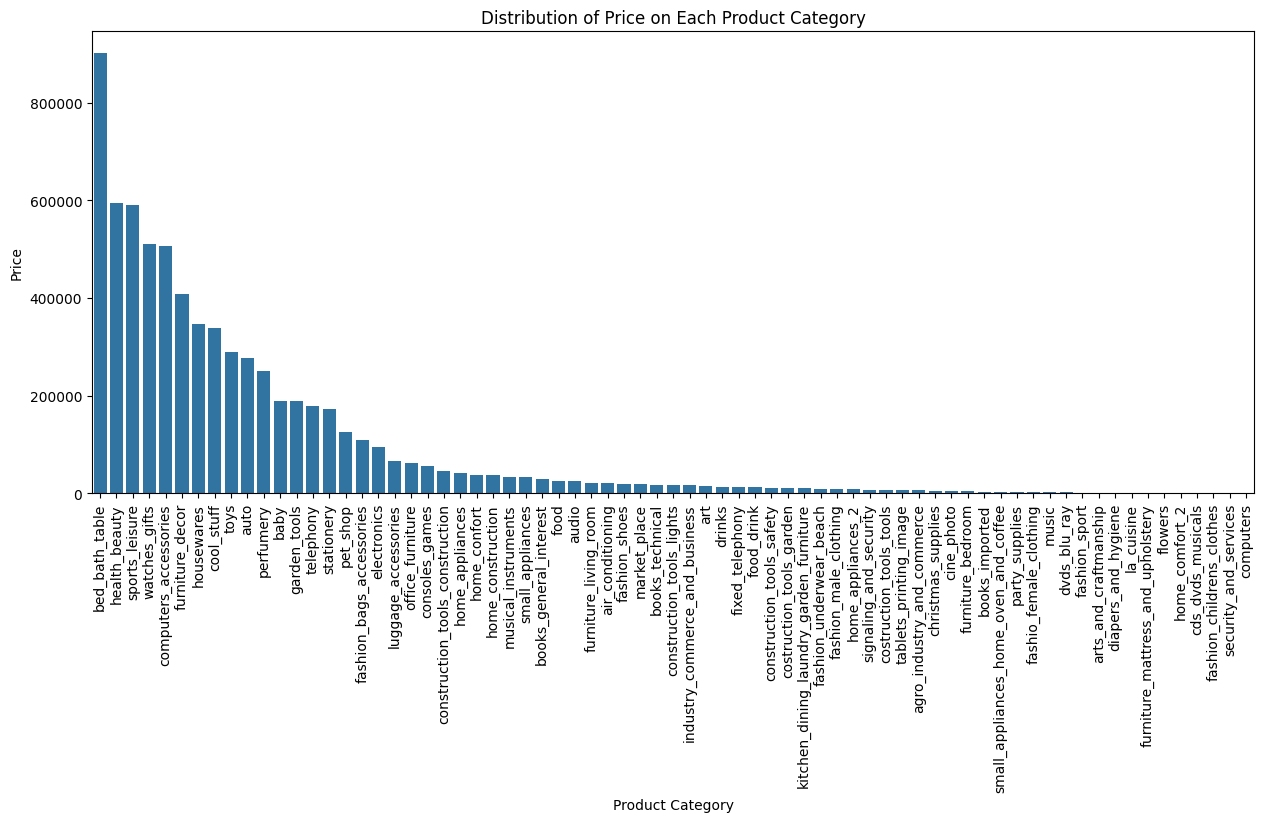

In [144]:
# Prepare the data
price_vis = (
    sales_df.groupby("product_category_name_english")
    .agg({"price": "sum"})
    .sort_values(by="price", ascending=False)
)

# Visualize the distribution of the price on each product category
plt.figure(figsize=(15, 6))
plt.title("Distribution of Price on Each Product Category")
plt.xlabel("Product Category")
plt.xticks(rotation="vertical")
plt.ylabel("Price")
sns.barplot(
    x="product_category_name_english",
    y="price",
    data=price_vis,
    estimator=np.mean,
    ci=None,
)

In [145]:
# Check the product category with the highest freight value
sales_df.groupby("product_category_name_english").agg(
    {"freight_value": "sum"}
).sort_values(by="freight_value", ascending=False)

,freight_value
product_category_name_english,
bed_bath_table,171362.08
health_beauty,113739.57
sports_leisure,109726.25
furniture_decor,92244.33
computers_accessories,92049.95
...,...
cds_dvds_musicals,140.19
furniture_mattress_and_upholstery,130.20
fashion_childrens_clothes,95.51


In [146]:
# Check the product category with the lowest freight value
sales_df.groupby("product_category_name_english").agg(
    {"freight_value": "sum"}
).sort_values(by="freight_value", ascending=True)

,freight_value
product_category_name_english,
computers,18.34
security_and_services,41.22
fashion_childrens_clothes,95.51
furniture_mattress_and_upholstery,130.20
cds_dvds_musicals,140.19
...,...
computers_accessories,92049.95
furniture_decor,92244.33
sports_leisure,109726.25


C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\3736049471.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: title={'center': 'Distribution of Freight Value on Each Product Category'}, xlabel='Product Category', ylabel='Freight Value'>

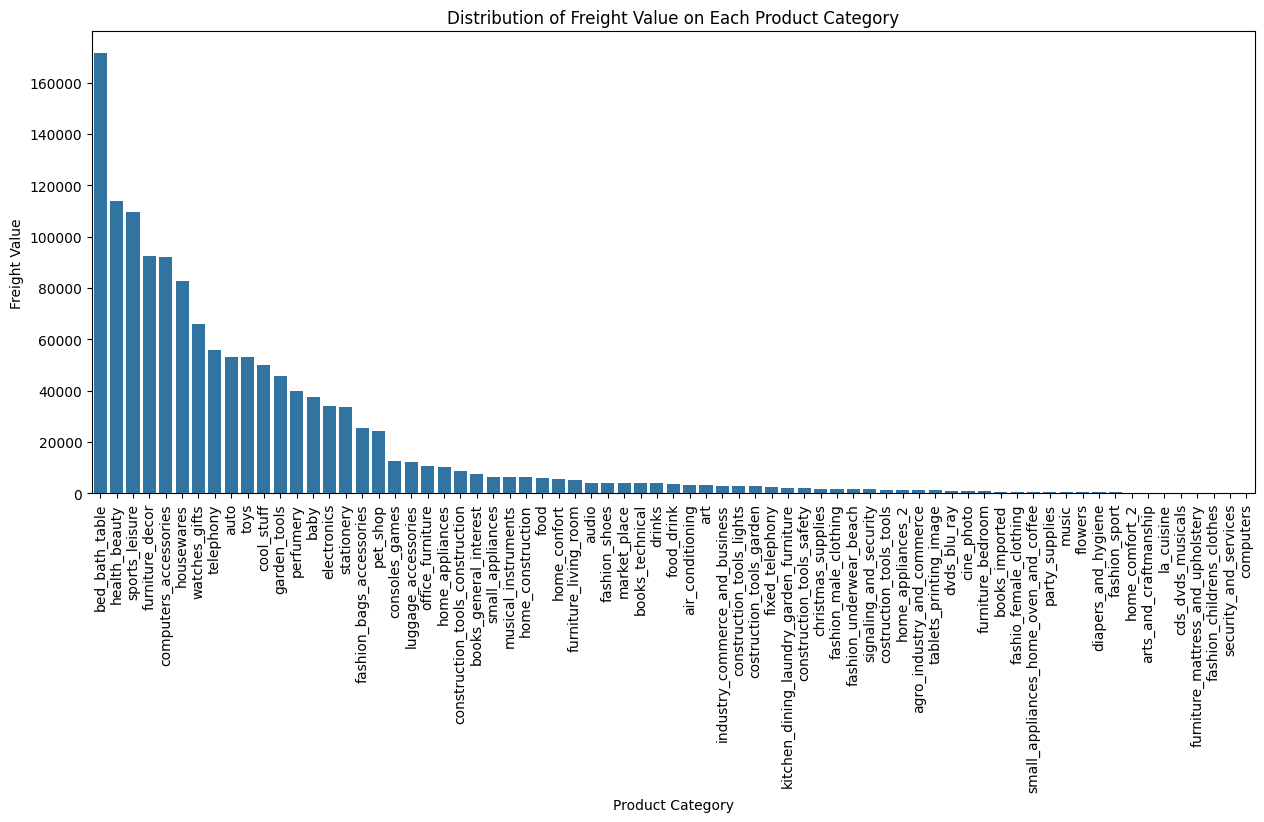

In [147]:
# Prepare the data for visualization
freight_value_vis = (
    sales_df.groupby("product_category_name_english")
    .agg({"freight_value": "sum"})
    .sort_values(by="freight_value", ascending=False)
)

# Visualize the distribution of the freight value on each product category
plt.figure(figsize=(15, 6))
plt.title("Distribution of Freight Value on Each Product Category")
plt.xlabel("Product Category")
plt.xticks(rotation="vertical")
plt.ylabel("Freight Value")
sns.barplot(
    x="product_category_name_english",
    y="freight_value",
    data=freight_value_vis,
    estimator=np.mean,
    ci=None,
)

In [148]:
# Check the product category with the highest quantity sales
sales_df.groupby("product_category_name_english").agg({"qty": "sum"}).sort_values(
    by="qty", ascending=False
)

,qty
product_category_name_english,
bed_bath_table,11652
health_beauty,8032
sports_leisure,7541
furniture_decor,7020
computers_accessories,6712
...,...
la_cuisine,10
fashion_childrens_clothes,8
furniture_mattress_and_upholstery,7


In [149]:
# Check the product category with the lowest quantity sales
sales_df.groupby("product_category_name_english").agg({"qty": "sum"}).sort_values(
    by="qty", ascending=True
)

,qty
product_category_name_english,
computers,1
security_and_services,2
furniture_mattress_and_upholstery,7
fashion_childrens_clothes,8
la_cuisine,10
...,...
computers_accessories,6712
furniture_decor,7020
sports_leisure,7541


C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\397884162.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: title={'center': 'Distribution of Quantity Sales on Each Product Category'}, xlabel='Product Category', ylabel='Quantity Sales'>

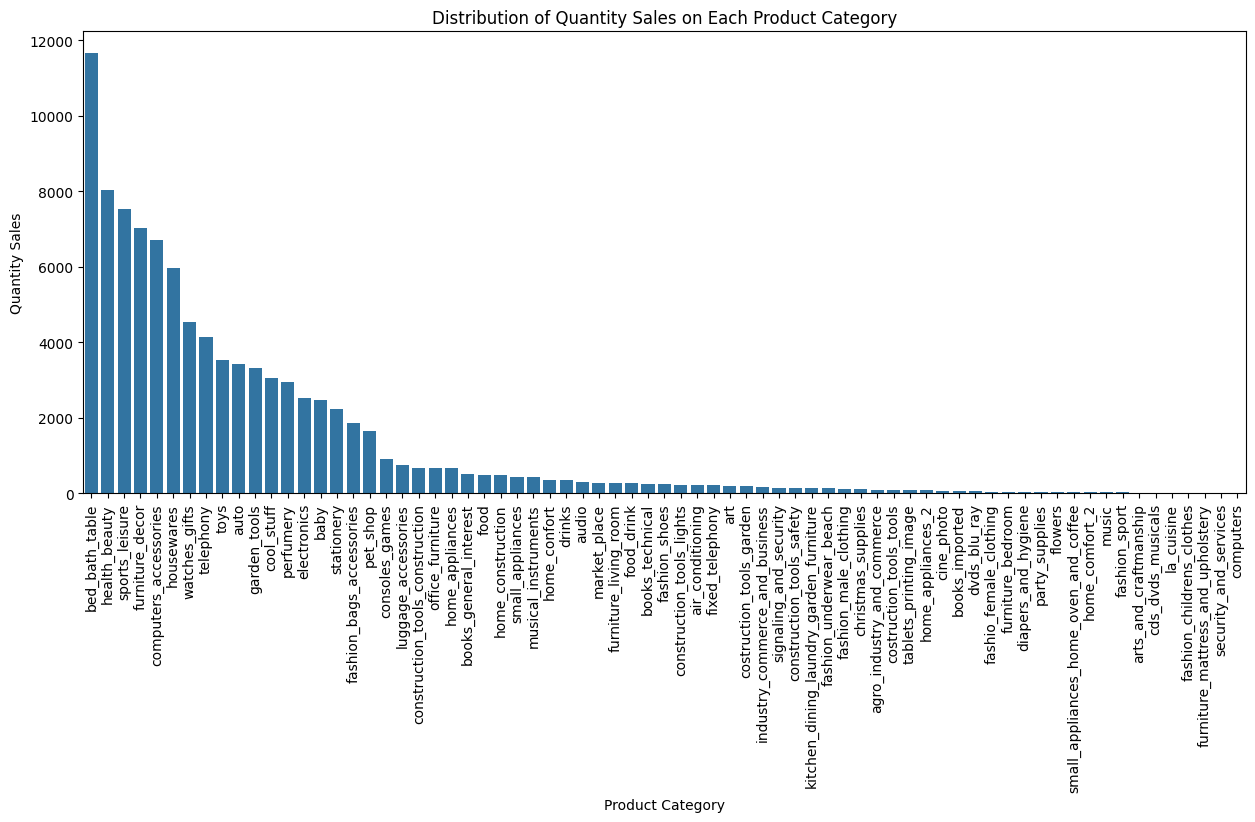

In [150]:
# Prepare the data for visualization
qty_each_category = (
    sales_df.groupby("product_category_name_english")
    .agg({"qty": "sum"})
    .sort_values(by="qty", ascending=False)
)

# Visualize the distribution of quantity sales on each product category
plt.figure(figsize=(15, 6))
plt.title("Distribution of Quantity Sales on Each Product Category")
plt.xlabel("Product Category")
plt.xticks(rotation="vertical")
plt.ylabel("Quantity Sales")
sns.barplot(
    x="product_category_name_english",
    y="qty",
    data=qty_each_category,
    estimator=np.mean,
    ci=None,
)

In [151]:
# Check the product category with the fastest shipping duration
sales_df.groupby("product_category_name_english").agg(
    {"shipping_duration": "sum"}
).sort_values(by="shipping_duration", ascending=True)

,shipping_duration
product_category_name_english,
bed_bath_table,-80009 days +00:25:26.290448384
computers,10 days 00:00:00
security_and_services,30 days 00:00:00
la_cuisine,69 days 00:00:00
fashion_childrens_clothes,74 days 00:00:00
...,...
housewares,54597 days 00:00:00
furniture_decor,69675 days 00:00:00
computers_accessories,74580 days 00:00:00


In [152]:
# Check the product category with the longest shipping duration
sales_df.groupby("product_category_name_english").agg(
    {"shipping_duration": "sum"}
).sort_values(by="shipping_duration", ascending=False)

,shipping_duration
product_category_name_english,
health_beauty,83523 days 00:00:00
sports_leisure,79252 days 00:00:00
computers_accessories,74580 days 00:00:00
furniture_decor,69675 days 00:00:00
housewares,54597 days 00:00:00
...,...
fashion_childrens_clothes,74 days 00:00:00
la_cuisine,69 days 00:00:00
security_and_services,30 days 00:00:00


### Payment Analysis


In [153]:
# Check the most frequent payment type
order_payments_df.groupby(by=["payment_type"]).size().reset_index(
    name="counts"
).sort_values(ascending=False, by="counts")

,payment_type,counts
1,credit_card,70269
0,boleto,18504
4,voucher,5685
2,debit_card,1444
3,not_defined,3


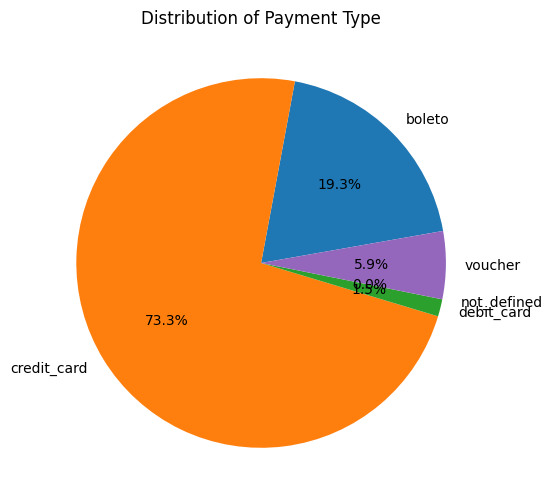

In [154]:
# Visualize the distribution of payment type with pie chart
plt.figure(figsize=(15, 6))
plt.title("Distribution of Payment Type")
plt.pie(
    order_payments_df.groupby(by=["payment_type"])
    .size()
    .reset_index(name="counts")["counts"],
    labels=order_payments_df.groupby(by=["payment_type"])
    .size()
    .reset_index(name="counts")["payment_type"],
    autopct="%1.1f%%",
    startangle=10,
)
plt.show()

### Customer Analysis


In [155]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [156]:
# Check the distribution of the number of customers per city
customers_df.groupby("customer_city").agg(
    {"customer_unique_id": "nunique"}
).sort_values(by="customer_unique_id", ascending=False)

,customer_unique_id
customer_city,
sao paulo,14984
rio de janeiro,6620
belo horizonte,2672
brasilia,2069
curitiba,1465
...,...
planaltino,1
pocao,1
pocao de pedras,1


In [157]:
# Check the distribution of the number of customers per state
customers_df.groupby("customer_state").agg(
    {"customer_unique_id": "nunique"}
).sort_values(by="customer_unique_id", ascending=False)

,customer_unique_id
customer_state,
SP,40302
RJ,12384
MG,11259
RS,5277
PR,4882
SC,3534
BA,3277
DF,2075
ES,1964


<Axes: title={'center': 'Count of the Number of Customers per State'}, xlabel='State', ylabel='Number of Customers'>

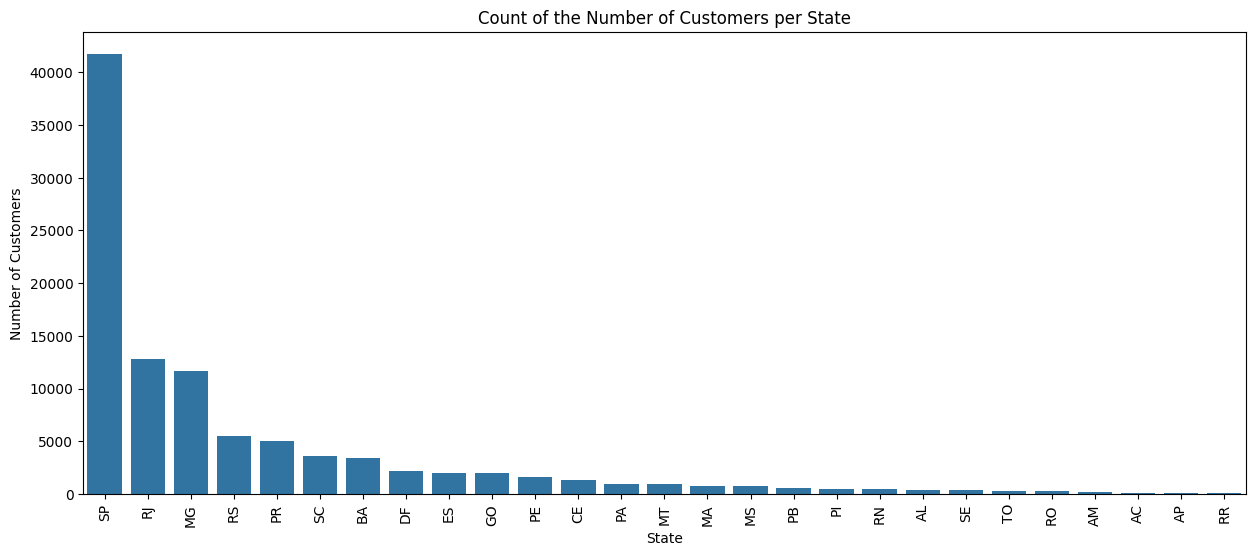

In [158]:
# Prepare the data for visualization
customers_per_state = customers_df["customer_state"].value_counts().reset_index()
customers_per_state.columns = ["customer_state", "count"]

# Sort the data
customers_per_state = customers_per_state.sort_values(by="count", ascending=False)

# Visualize the count of the number of customers per state
plt.figure(figsize=(15, 6))
plt.title("Count of the Number of Customers per State")
plt.xlabel("State")
plt.xticks(rotation="vertical")
plt.ylabel("Number of Customers")
sns.barplot(x="customer_state", y="count", data=customers_per_state.reset_index())

### Reviews Analysis


In [159]:
# Merge the table sales and order_reviews
sales_df = sales_df.merge(order_reviews_df, on="order_id", how="left")

In [160]:
# Check the distribution of product category's rating scores given by customers
sales_df.groupby("product_category_name_english").agg(
    {"review_score": "mean"}
).sort_values(by="review_score", ascending=False)

,review_score
product_category_name_english,
cds_dvds_musicals,4.636364
fashion_childrens_clothes,4.500000
furniture_bedroom,4.500000
books_general_interest,4.449485
food_drink,4.424779
...,...
fashio_female_clothing,3.714286
fashion_male_clothing,3.637931
office_furniture,3.608350


C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\2762446759.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: title={'center': "Distribution of Product Category's Rating Scores"}, xlabel='Product Category', ylabel='Rating Score'>

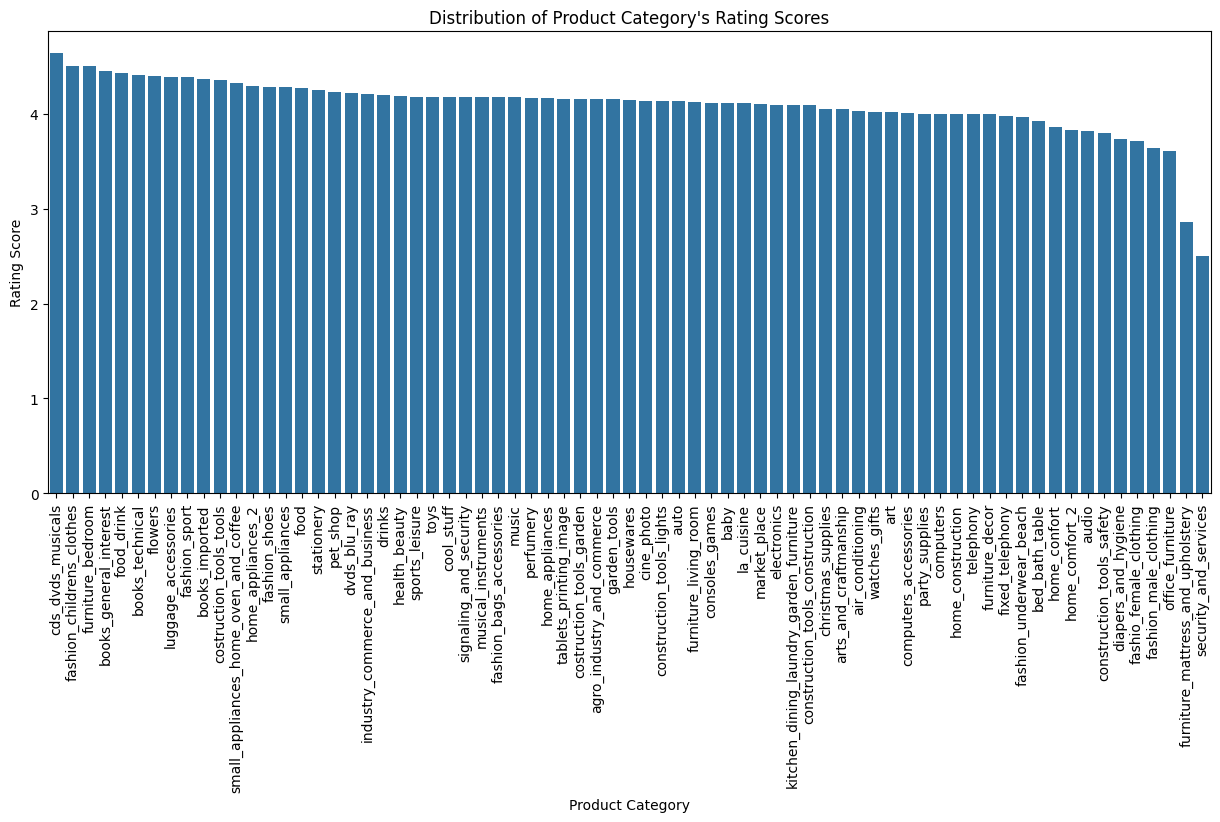

In [161]:
# Prepare the data
product_score = (
    sales_df.groupby("product_category_name_english")["review_score"]
    .mean()
    .reset_index()
)
product_score = product_score.sort_values(by="review_score", ascending=False)

# Visualize the distribution of product category's rating scores given by customers
plt.figure(figsize=(15, 6))
plt.title("Distribution of Product Category's Rating Scores")
plt.xlabel("Product Category")
plt.xticks(rotation="vertical")
plt.ylabel("Rating Score")
sns.barplot(
    x="product_category_name_english",
    y="review_score",
    data=product_score,
    ci=None,
)

C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\2673130958.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: title={'center': "Distribution of Product Category's Rating Scores"}, xlabel='Product Category', ylabel='Rating Score'>

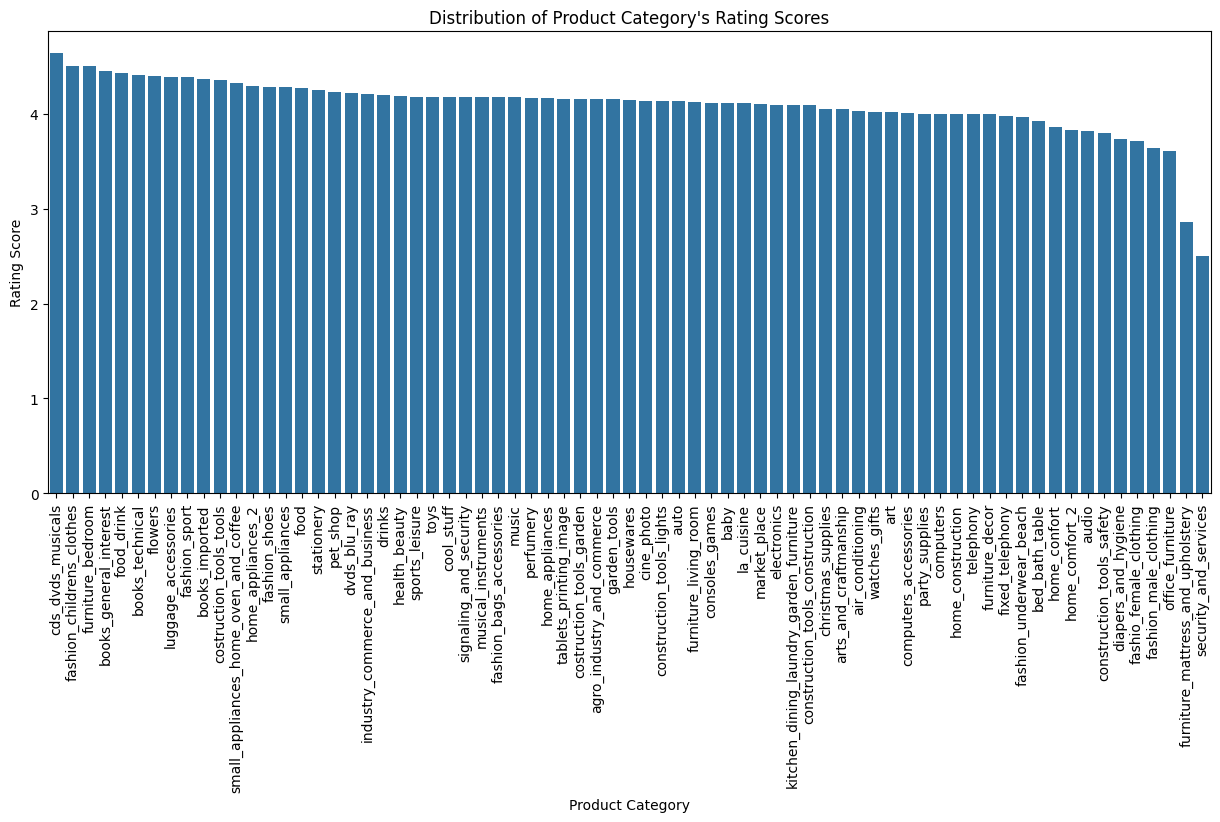

In [162]:
# Prepare the data
data = (
    sales_df.groupby("product_category_name_english")["review_score"]
    .mean()
    .reset_index()
)
data = data.sort_values(by="review_score", ascending=False)

# Visualize the distribution of product category's rating scores given by customers
plt.figure(figsize=(15, 6))
plt.title("Distribution of Product Category's Rating Scores")
plt.xlabel("Product Category")
plt.xticks(rotation="vertical")
plt.ylabel("Rating Score")
sns.barplot(
    x="product_category_name_english",
    y="review_score",
    data=data,
    ci=None,
)

### Seller Analysis


In [163]:
# Merge the table sales and sellers
sales_seller_df = sales_df.merge(sellers_df, on="seller_id")
sales_seller_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_ordinal,shipping_time,...,on_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04,736222,-36 days,...,0,6916ca4502d6d3bfd39818759d55d536,1.0,No comment,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,81810,curitiba,PR
1,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,2016-11-09,2016-10-25,736239,-15 days,...,0,34d62feeefaf60ef6ff7204af19fe109,1.0,No comment,No comment,2016-10-27,2016-10-27 23:40:51,5503,sao paulo,SP
2,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14,2016-11-23,736240,40 days,...,1,212e6ab2b4801ca707b950aa0207ff8a,5.0,No comment,No comment,2016-10-19,2016-10-22 00:23:57,13481,limeira,SP
3,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27,2016-11-07,736240,11 days,...,1,dc62f1e20d7f280e54066b6a92841086,4.0,No comment,Tudo certo...,2016-10-28,2016-10-29 11:29:53,15802,catanduva,SP
4,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08,2016-11-25,736240,17 days,...,1,f9fe37d91c506b29a0b4d9107f667bde,1.0,No comment,"O produto foi comprado em 10/10/2016, não cheg...",2016-11-09,2016-11-09 21:04:42,5571,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85574,d03ca98f59480e7e76c71fa83ecd8fb6,56b1ac2855cc6d7950b4ffa6a9b41b0d,delivered,2018-08-29,2018-08-29 11:24:02,2018-08-29 17:46:00,2018-08-30,2018-09-04,736935,5 days,...,1,5c7d6b979aed548db0901cf9ffe3a2dc,5.0,No comment,No comment,2018-08-31,2018-09-03 13:58:54,7152,guarulhos,SP
85575,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30,2018-09-03,736935,4 days,...,1,7a11bf826668febba0800ec35884958c,1.0,Muito frágil !!!,"Achei o produto muito pequeno e onde fica a ""t...",2018-08-31,2018-09-21 13:54:38,5125,sao paulo,SP
85576,fb393211459aac00af932cd7ab4fa2cc,54365416b7ef5599f54a6c7821d5d290,delivered,2018-08-29,2018-08-29 09:25:12,2018-08-29 15:48:00,2018-08-30,2018-09-04,736935,5 days,...,1,a6b04aa8f3c756a9b4a31e59928b47fe,1.0,Não gostei,"Comprei um relógio, e quando chegou, me depare...",2018-08-31,2018-09-03 10:20:19,5849,sao paulo,SP
85577,d70442bc5e3cb7438da497cc6a210f80,10a79ef2783cae3d8d678e85fde235ac,delivered,2018-08-29,2018-08-29 10:35:16,2018-08-29 19:57:00,2018-08-30,2018-09-04,736935,5 days,...,1,925be27f368ac6590196ef6889ec90c6,5.0,Recomendo,"Entrega rápida, até mesmo antes do prazo estip...",2018-08-31,2018-09-02 23:04:33,4461,sao paulo,SP


In [164]:
# Check seller with the highest sales performance
sales_seller_df.groupby("seller_id").agg({"price": "sum"}).sort_values(
    by="price", ascending=False
)

,price
seller_id,
4a3ca9315b744ce9f8e9374361493884,166435.77
4869f7a5dfa277a7dca6462dcf3b52b2,151790.86
7a67c85e85bb2ce8582c35f2203ad736,134750.00
da8622b14eb17ae2831f4ac5b9dab84a,134527.18
6560211a19b47992c3666cc44a7e94c0,116082.82
...,...
34aefe746cd81b7f3b23253ea28bef39,8.00
702835e4b785b67a084280efca355756,7.60
1fa2d3def6adfa70e58c276bb64fe5bb,6.90


In [165]:
# Check seller states with the highest sales performance
sales_seller_df.groupby("seller_state").agg({"price": "sum"}).sort_values(
    by="price", ascending=False
)

,price
seller_state,
SP,4900272.95
PR,549975.08
MG,514799.37
RJ,338745.70
SC,238791.61
RS,142036.04
DF,56863.13
BA,41960.59
PE,40063.02


C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\1230733545.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: title={'center': 'Distribution of Seller States with the Highest Sales Performance'}, xlabel='Seller State', ylabel='Sales Performance'>

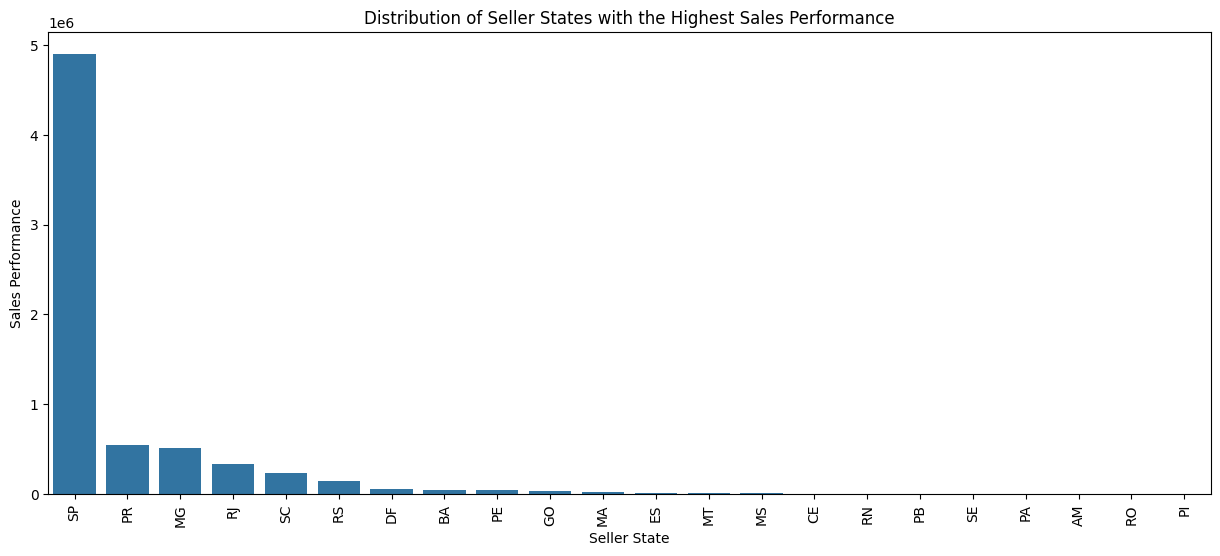

In [166]:
# Prepare the data
seller_state = (
    sales_seller_df.groupby("seller_state")["price"]
    .sum()
    .reset_index()
    .sort_values(ascending=False, by="price")
)

# Visualize the distribution of seller states with the highest sales performance
plt.figure(figsize=(15, 6))
plt.title("Distribution of Seller States with the Highest Sales Performance")
plt.xlabel("Seller State")
plt.xticks(rotation="vertical")
plt.ylabel("Sales Performance")
sns.barplot(
    x="seller_state",
    y="price",
    data=seller_state,
    estimator=np.mean,
    ci=None,
)

### Merge all of the dataframe


In [167]:
# Merge the sales_df and customers_df
all_df = sales_df.merge(customers_df, on="customer_id", how="left")

# Check the summary of the dataset and its columns
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85579 non-null  object         
 1   customer_id                    85579 non-null  object         
 2   order_status                   85579 non-null  object         
 3   order_purchase_timestamp       85579 non-null  datetime64[ns] 
 4   order_approved_at              85567 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84794 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85579 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85579 non-null  datetime64[ns] 
 8   date_ordinal                   85579 non-null  int64          
 9   shipping_time                  85579 non-null  timedelta64[ns]
 10  shipping_duration              85579 non-null  timedelta64[ns]
 11  es

In [168]:
# Add a new column total price to the all_df
all_df["total_price"] = all_df["qty"] * all_df["price"]
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_ordinal,shipping_time,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_price
0,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04,736222,-36 days,...,1.0,No comment,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,134.97
1,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,2016-11-09,2016-10-25,736239,-15 days,...,1.0,No comment,No comment,2016-10-27,2016-10-27 23:40:51,0eb1ee9dba87f5b36b4613a65074337c,2975,sao paulo,SP,100.00
2,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14,2016-11-23,736240,40 days,...,5.0,No comment,No comment,2016-10-19,2016-10-22 00:23:57,87776adb449c551e74c13fc34f036105,12030,taubate,SP,29.99
3,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27,2016-11-07,736240,11 days,...,4.0,No comment,Tudo certo...,2016-10-28,2016-10-29 11:29:53,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,21.90
4,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08,2016-11-25,736240,17 days,...,1.0,No comment,"O produto foi comprado em 10/10/2016, não cheg...",2016-11-09,2016-11-09 21:04:42,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,21.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85574,d03ca98f59480e7e76c71fa83ecd8fb6,56b1ac2855cc6d7950b4ffa6a9b41b0d,delivered,2018-08-29,2018-08-29 11:24:02,2018-08-29 17:46:00,2018-08-30,2018-09-04,736935,5 days,...,5.0,No comment,No comment,2018-08-31,2018-09-03 13:58:54,0421e7a23f21e5d54efed456aedbc513,13322,salto,SP,109.90
85575,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30,2018-09-03,736935,4 days,...,1.0,Muito frágil !!!,"Achei o produto muito pequeno e onde fica a ""t...",2018-08-31,2018-09-21 13:54:38,7a22d14aa3c3599238509ddca4b93b01,5863,sao paulo,SP,63.90
85576,fb393211459aac00af932cd7ab4fa2cc,54365416b7ef5599f54a6c7821d5d290,delivered,2018-08-29,2018-08-29 09:25:12,2018-08-29 15:48:00,2018-08-30,2018-09-04,736935,5 days,...,1.0,Não gostei,"Comprei um relógio, e quando chegou, me depare...",2018-08-31,2018-09-03 10:20:19,b4dcade04bc548b7e3b0243c801f8c26,13184,hortolandia,SP,99.00
85577,d70442bc5e3cb7438da497cc6a210f80,10a79ef2783cae3d8d678e85fde235ac,delivered,2018-08-29,2018-08-29 10:35:16,2018-08-29 19:57:00,2018-08-30,2018-09-04,736935,5 days,...,5.0,Recomendo,"Entrega rápida, até mesmo antes do prazo estip...",2018-08-31,2018-09-02 23:04:33,21dbe8eabd00b34492a939c540e2b1a7,2413,sao paulo,SP,6.90


## Visualization & Explanatory Analysis


### Question 1: Which product category has the most outstanding performance in terms of rating reviews from 2017 to 2018?


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


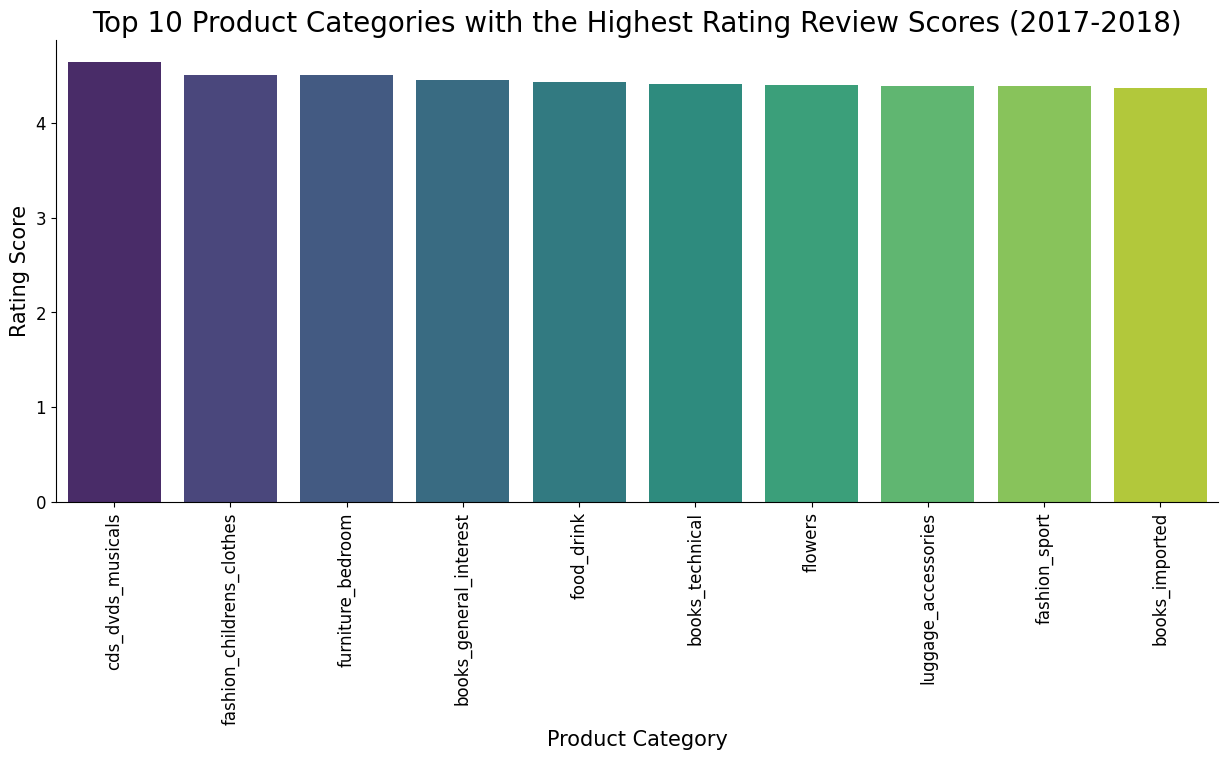

In [169]:
# Filtering the data for time range 2017-01-01 to 2018-08-31
filtered_data = sales_df[
    (sales_df["review_creation_date"] >= "2017-01-01")
    & (sales_df["review_creation_date"] <= "2018-08-31")
]

# Get the top 10 product categories with the highest rating review scores
top_10_categories = (
    filtered_data.groupby("product_category_name_english")["review_score"]
    .mean()
    .nlargest(10)
)

# Visualize the top 10 product categories with the highest rating review scores from 2017 to 2018
plt.figure(figsize=(15, 6))

# Use a more descriptive title and increase its font size
plt.title(
    "Top 10 Product Categories with the Highest Rating Review Scores (2017-2018)",
    fontsize=20,
)

# Labeling axes and increase their font size
plt.xlabel("Product Category", fontsize=15)
plt.xticks(rotation="vertical")
plt.ylabel("Rating Score", fontsize=15)

# Use a color palette that's visually appealing
sns.barplot(
    x=top_10_categories.index,
    y=top_10_categories.values,
    palette="viridis",  # Change color palette for a more appealing look
    hue=top_10_categories.index,
    legend=False,
)

# Remove the legend
plt.legend().remove()

# Remove the top and right spines for a cleaner look
sns.despine()

# Increase the font size of the tick labels
plt.tick_params(labelsize=12)

plt.show()

### Question 2: What is our current on-time delivery rate, and how can we improve it to meet customer expectations and increase customer satisfaction?


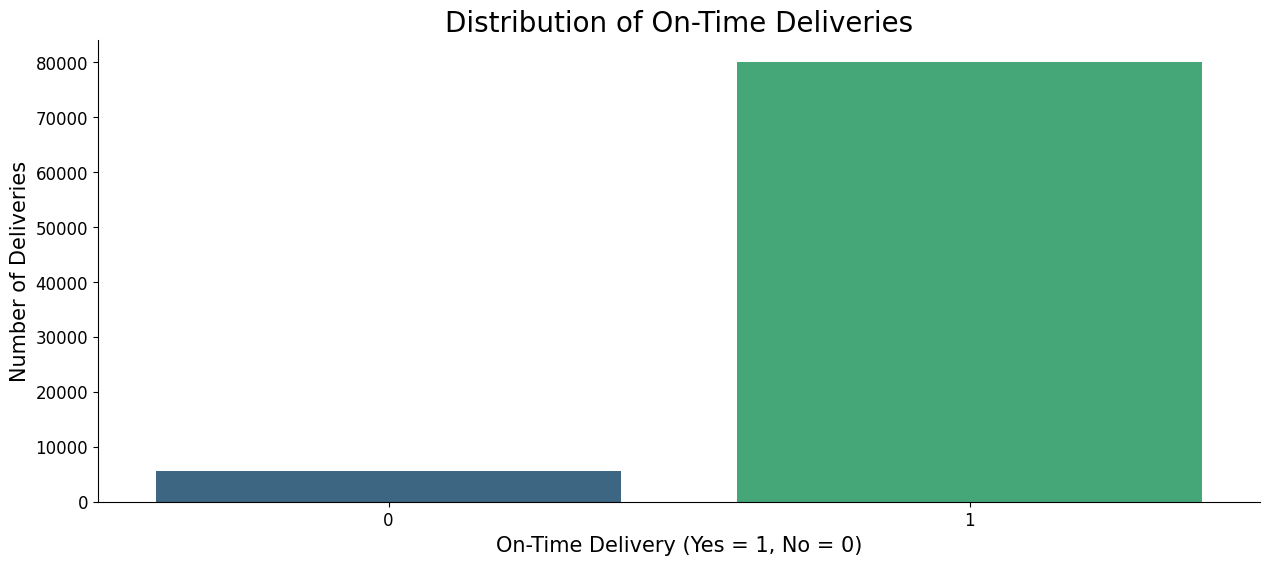

In [170]:
# Visualize the latest on time delivery rate
plt.figure(figsize=(15, 6))

# Use a more descriptive title
plt.title("Distribution of On-Time Deliveries", fontsize=20)

# Labeling  axes
plt.xlabel("On-Time Delivery (Yes = 1, No = 0)", fontsize=15)
plt.ylabel("Number of Deliveries", fontsize=15)


# Use a color palette that's easy on the eyes
sns.countplot(
    x="on_time", data=sales_df, palette="viridis", hue="on_time", legend=False
)

# Remove the top and right spines for a cleaner look
sns.despine()

# Increase the font size of the tick labels
plt.tick_params(labelsize=12)

plt.show()

In [171]:
# Create on-time delivery rate
on_time_rate = sales_df["on_time"].value_counts(normalize=True) * 100
print(f"On-Time Delivery Rate: {on_time_rate[1]:.2f}%")

On-Time Delivery Rate: 93.57%


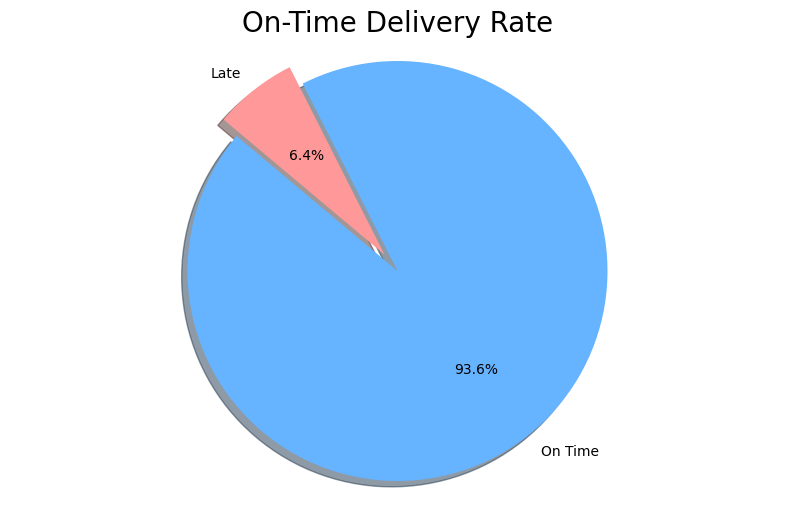

In [172]:
# Visualize the on-time delivery rate to answer the question "What is the on-time delivery rate?"
plt.figure(figsize=(10, 6))
plt.title("On-Time Delivery Rate", fontsize=20)
colors = ["#66b3ff", "#ff9999"]
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.pie(
    on_time_rate.values,
    explode=explode,
    labels=["On Time", "Late"],
    colors=colors,
    autopct="%1.1f%%",
    startangle=140,
    shadow=True,
)

# Ensure pie is drawn as a circle.
plt.axis("equal")

plt.show()

### Question 3: What is the demographic profile of our customer base?


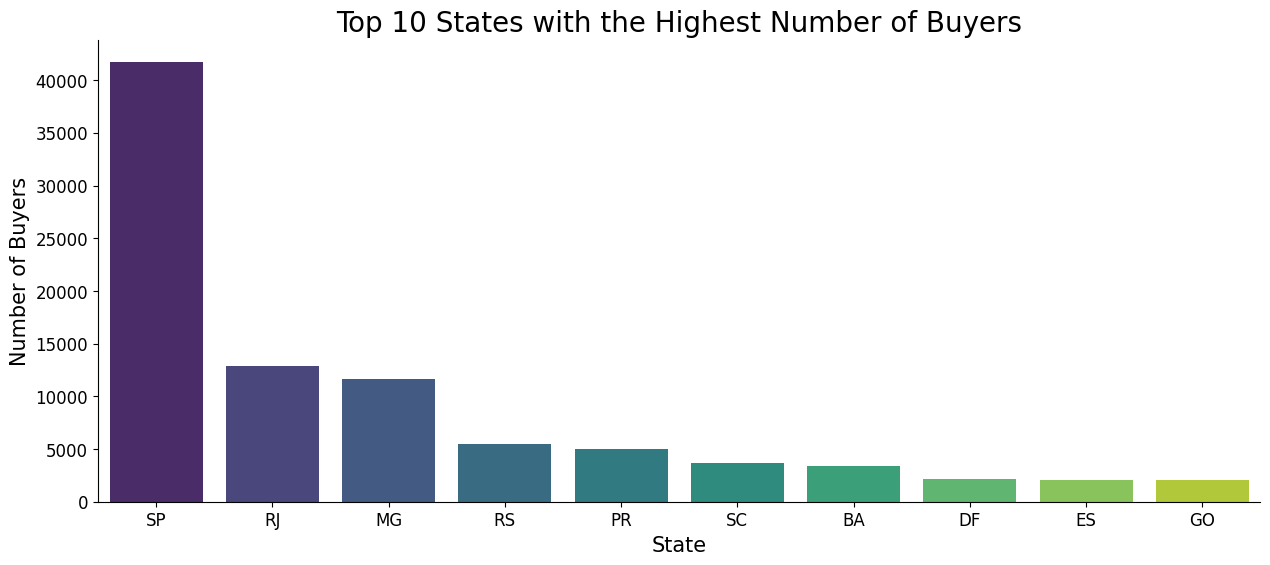

In [173]:
# Create a demographic profile of the customers to answer the question "What is the demographic profile of the customers?"
# Top 10 states with the highest number of buyers
# Prepare the data
customer_demographic = (
    customers_df.groupby("customer_state")["customer_unique_id"].count().reset_index()
)
customer_demographic.columns = ["customer_state", "count"]
customer_demographic = customer_demographic.sort_values(by="count", ascending=False)

# Visualize the demographic profile of the customers

# Get top 10 states
top_10_states = customer_demographic.nlargest(10, "count")

plt.figure(figsize=(15, 6))

# Use a more descriptive title and increase its font size
plt.title("Top 10 States with the Highest Number of Buyers", fontsize=20)

# Labeling axes and increase their font size
plt.xlabel("State", fontsize=15)
plt.ylabel("Number of Buyers", fontsize=15)

# Use a color palette that's visually appealing
sns.barplot(
    x="customer_state",
    y="count",
    data=top_10_states,
    palette="viridis",  # Change color palette for a more appealing look
    hue="customer_state",
    legend=False,
)

# Remove the top and right spines for a cleaner look
sns.despine()

# Increase the font size of the tick labels
plt.tick_params(labelsize=12)

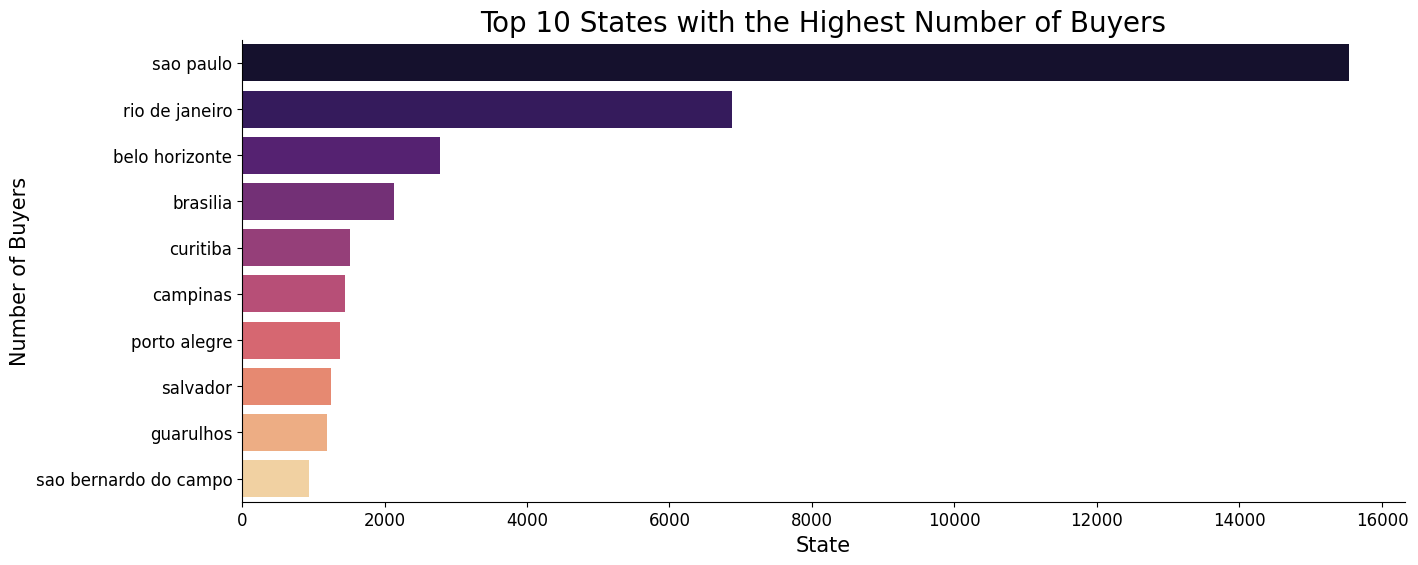

In [174]:
# Top 10 cities with the highest number of buyers

# Prepare the data
customer_demographic = (
    customers_df.groupby("customer_city")["customer_unique_id"].count().reset_index()
)
customer_demographic.columns = ["customer_city", "count"]
customer_demographic = customer_demographic.sort_values(by="count", ascending=False)

# Visualize the demographic profile of the customers

# Get top 10 cities
top_10_states = customer_demographic.nlargest(10, "count")

plt.figure(figsize=(15, 6))

# Use a more descriptive title and increase its font size
plt.title("Top 10 States with the Highest Number of Buyers", fontsize=20)

# Labeling axes and increase their font size
plt.xlabel("State", fontsize=15)
plt.ylabel("Number of Buyers", fontsize=15)

# Use a color palette that's visually appealing
sns.barplot(
    x="count",
    y="customer_city",
    data=top_10_states,
    palette="magma",  # Change color palette for a more appealing look
    hue="customer_city",
    legend=False,
)

# Remove the top and right spines for a cleaner look
sns.despine()

# Increase the font size of the tick labels
plt.tick_params(labelsize=12)

### Question 4: During the final quarter of 2018, what was the purchasing frequency of the customers?


### Advanced Analysis: RFM Analysis


Description:<br>
**RFM (Recency, Frequency, Monetary)** analysis is a data-driven customer segmentation technique used to **identify** and **target the most valuable customers** based on their purchase behavior. It **involves** quantitatively **ranking** and **grouping customers** **based on** the **recency**, **frequency**, and **monetary** value of their transactions. The RFM model assigns numerical scores to each customer based on these factors, allowing businesses to categorize customers into segments for targeted marketing strategies.


#### RFM(Recency, Frequency, Monetary) Analysis

The RFM model is based on three quantitative factors:

- Recency: How recently a customer has made a purchase
- Frequency: How often a customer makes a purchase
- Monetary value: How much money a customer spends on purchases


In [175]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       85579 non-null  object         
 1   customer_id                    85579 non-null  object         
 2   order_status                   85579 non-null  object         
 3   order_purchase_timestamp       85579 non-null  datetime64[ns] 
 4   order_approved_at              85567 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   84794 non-null  datetime64[ns] 
 6   order_delivered_customer_date  85579 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  85579 non-null  datetime64[ns] 
 8   date_ordinal                   85579 non-null  int64          
 9   shipping_time                  85579 non-null  timedelta64[ns]
 10  shipping_duration              85579 non-null  timedelta64[ns]
 11  es

In [176]:
# Create a RFM analysis to answer the question "What is the RFM analysis of the customers?"

# Create a new column that represent the monetary value of each order
all_df["total_price"] = all_df["price"] * all_df["qty"]

rfm_df = all_df.groupby("customer_unique_id", as_index=False).agg(
    {"order_purchase_timestamp": "max", "order_id": "nunique", "total_price": "sum"}
)

rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df.head(5)

,customer_unique_id,max_order_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00


In [177]:
# Convert 'max_order_timestamp' to date
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date

# Get the most recent date in 'order_purchase_timestamp'
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()

# Create 'recency' column
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(
    lambda x: (recent_date - x).days
)

rfm_df.head(5)

,customer_unique_id,max_order_timestamp,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,163
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,586
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,370
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,337


In [178]:
# Drop the max_order_timestamp column
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df.head(5)

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163
2,0000f46a3911fa3c0805444483337064,1,69.00,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337


In [179]:
# Describes the statistical summary of the DataFrame 'rfm_df'.
rfm_df.describe()

,frequency,monetary,recency
count,79593.000000,79593.000000,79593.000000
mean,1.032352,94.031155,289.746410
std,0.205026,78.802163,153.324803
min,1.000000,0.850000,44.000000
25%,1.000000,39.990000,166.000000
50%,1.000000,74.800000,271.000000
75%,1.000000,125.000000,399.000000
max,16.000000,2200.000000,762.000000


In [180]:
# Show the distribution of the recency attribute
rfm_df.sort_values(by="recency", ascending=True).head()

,customer_unique_id,frequency,monetary,recency
79308,ff22e30958c13ffe219db7d711e8f564,2,290.00,44
10604,21dbe8eabd00b34492a939c540e2b1a7,1,6.90,49
54741,afbcfd0b9c5233e7ccc73428526fbb52,1,457.75,49
3917,0c6d7218d5f3fa14514fd29865269993,1,169.80,49
56298,b4dcade04bc548b7e3b0243c801f8c26,1,99.00,49


In [181]:
# Show the distribution of the frequency attribute
rfm_df.sort_values(by="frequency", ascending=False).head()

,customer_unique_id,frequency,monetary,recency
43896,8d50f5eadf50201ccdcedfb9e2ac8455,16,729.62,58
19468,3e43e6105506432c953e165fb2acf44c,9,1000.85,232
31329,6469f99c1f9dfae7733b25662e7f1782,7,664.20,111
8590,1b6c7548a2a1f9037c1fd3ddfed95f33,6,684.22,245
5940,12f5d6e1cbf93dafd9dcc19095df0b3d,6,58.40,650


In [182]:
# Show the distribution of the monetary attribute
rfm_df.sort_values(by="monetary", ascending=False).head()

,customer_unique_id,frequency,monetary,recency
41991,86df00dc5fd68f4dd5d5945ca19f3ed6,3,2200.00,369
60993,c402f431464c72e27330a67f7b94d4fb,1,2000.00,237
9315,1da09dd64e235e7c2f29a4faff33535c,3,1980.28,279
32932,698e1cf81d01a3d389d96145f7fa6df8,1,1974.00,420
60239,c169c9937db997a267f749cdd64c161f,2,1511.20,526


C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\2905986654.py:9: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(


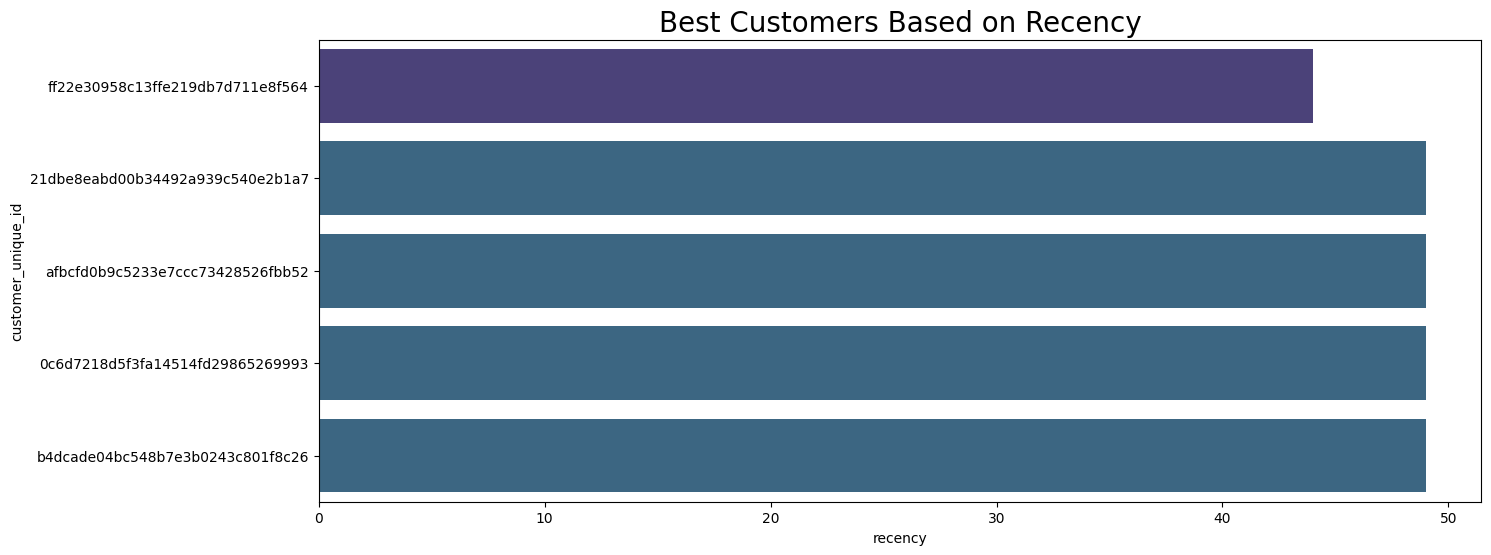

In [183]:
#  Identify the best customer based on recency parameters

plt.figure(figsize=(15, 6))

# Use a color palette that's visually appealing
colors = sns.color_palette("viridis", 5)

# Plot for Recency
sns.barplot(
    y="customer_unique_id",
    x="recency",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors,
    hue="recency",
    legend=False,
)

# Add a descriptive title
plt.title("Best Customers Based on Recency", fontsize=20)

plt.show()

C:\Users\Tanmay Walke\AppData\Local\Temp\ipykernel_10340\1190803963.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


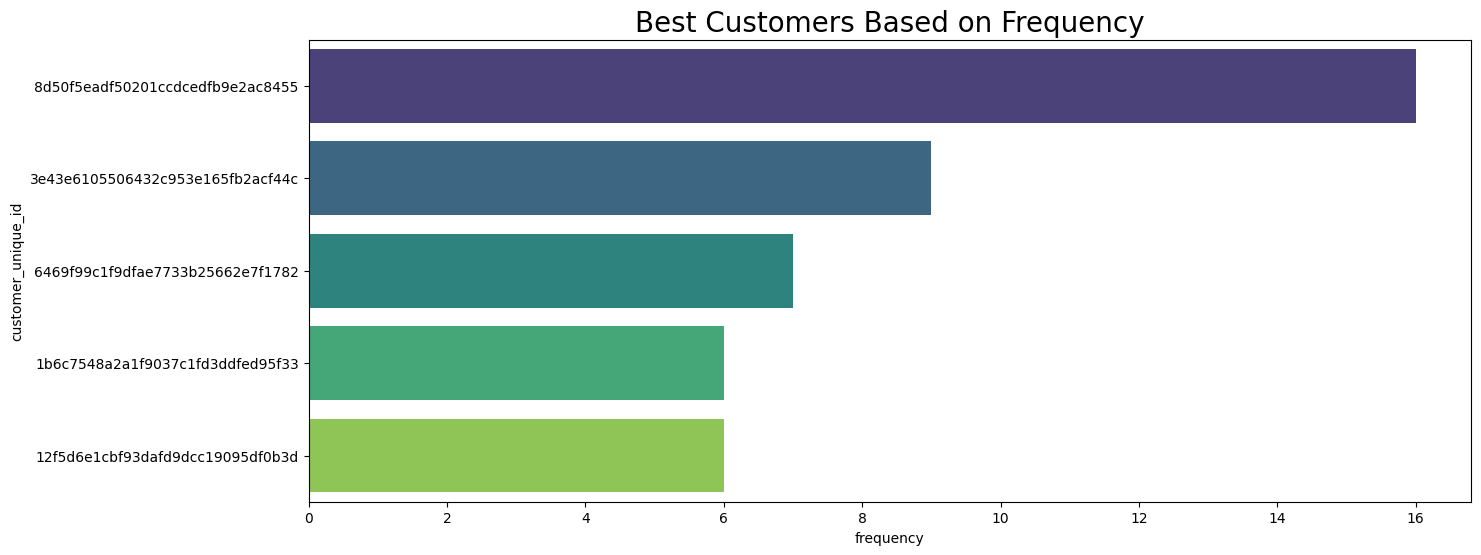

In [184]:
#  Identify the best customer based on frequency parameters

plt.figure(figsize=(15, 6))

# Use a color palette that's visually appealing
colors = sns.color_palette("viridis", 5)

# Plot for Recency
sns.barplot(
    y="customer_unique_id",
    x="frequency",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
)

# Add a descriptive title
plt.title("Best Customers Based on Frequency", fontsize=20)

plt.show()

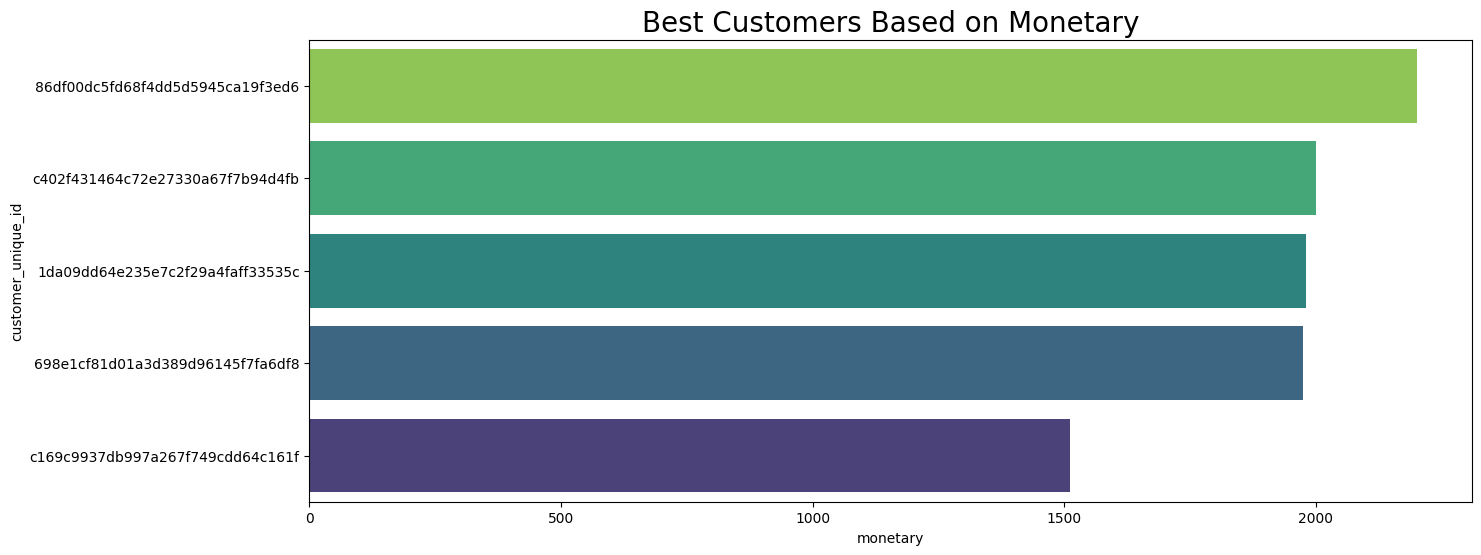

In [185]:
#  Identify the best customer based on monetary parameters

plt.figure(figsize=(15, 6))

# Use a color palette that's visually appealing
colors = sns.color_palette("viridis", 5)

# Plot for Recency
sns.barplot(
    y="customer_unique_id",
    x="monetary",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors,
    hue="monetary",
    legend=False,
)

# Add a descriptive title
plt.title("Best Customers Based on Monetary", fontsize=20)

plt.show()

In [186]:
# Identify the total amount of top customers spend based on the monetary parameters
total_spending = rfm_df.groupby(by="customer_unique_id").agg({"monetary": "sum"})

# Rename the columns
total_spending = total_spending.rename(columns={"monetary": "Spending Amount"})

# Add a total row
total_spending.loc["Total"] = total_spending.sum()

total_spending

,Spending Amount
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
0000f46a3911fa3c0805444483337064,69.00
0000f6ccb0745a6a4b88665a16c9f078,25.99
0004aac84e0df4da2b147fca70cf8255,180.00
...,...
fffea47cd6d3cc0a88bd621562a9d061,64.89
ffff371b4d645b6ecea244b27531430a,89.90
ffff5962728ec6157033ef9805bacc48,115.00


In [187]:
# Sort customers based on recency, frequency, and monetary score

# Create a new column that represent the recency score of each customer
rfm_df["r_rank"] = rfm_df["recency"].rank(ascending=False)

# Create a new column that represent the frequency score of each customer
rfm_df["f_rank"] = rfm_df["frequency"].rank(ascending=True)

# Create a new column that represent the monetary score of each customer
rfm_df["m_rank"] = rfm_df["monetary"].rank(ascending=True)

rfm_df.head(5)

,customer_unique_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160,61038.0,38635.5,60873.5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163,60270.5,38635.5,4131.0
2,0000f46a3911fa3c0805444483337064,1,69.00,586,2936.5,38635.5,36765.5
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370,23259.5,38635.5,9439.5
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337,27187.5,38635.5,71136.0


In [188]:
# Normalize the rank of the customers based on recency, frequency, and monetary scores
rfm_df["r_rank_norm"] = (rfm_df["r_rank"] / rfm_df["r_rank"].max()) * 100
rfm_df["f_rank_norm"] = (rfm_df["f_rank"] / rfm_df["f_rank"].max()) * 100
rfm_df["m_rank_norm"] = (rfm_df["m_rank"] / rfm_df["m_rank"].max()) * 100

# Drop the original rank columns
rfm_df.drop(["r_rank", "f_rank", "m_rank"], axis=1, inplace=True)

rfm_df.head(5)

,customer_unique_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160,76.687648,48.541329,76.480972
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163,75.723368,48.541329,5.190155
2,0000f46a3911fa3c0805444483337064,1,69.00,586,3.689395,48.541329,46.191876
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370,29.223047,48.541329,11.859711
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337,34.158155,48.541329,89.374694


In [189]:
# Calculate RFM Score
rfm_df["RFM_score"] = (
    0.15 * rfm_df["r_rank_norm"]
    + 0.28 * rfm_df["f_rank_norm"]
    + 0.57 * rfm_df["m_rank_norm"]
)

# Scale the RFM Score
rfm_df["RFM_score"] *= 0.05

# Round the RFM Score to 2 decimal places
rfm_df = rfm_df.round(2)

# Display the top 5 customers based on RFM Score
rfm_df[["customer_unique_id", "RFM_score"]].head(5).sort_values(
    by="RFM_score", ascending=False
)

,customer_unique_id,RFM_score
4,0004aac84e0df4da2b147fca70cf8255,3.48
0,0000366f3b9a7992bf8c76cfdf3221e2,3.43
2,0000f46a3911fa3c0805444483337064,2.02
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.40
3,0000f6ccb0745a6a4b88665a16c9f078,1.24


#### Customer Segmentation based on RFM Analysis

RFM analysis numerically ranks a customer in each of these five categories with the higher number indicating better results:

1. Top Customers are the customers who bought most recently, most often, and spend the most.
2. High Value customers are the customers who bought most often and spend the most.
3. Middle Value Customers are the customers who bought most recently and spend the most.
4. Low Value Customers are the customers who bought most recently, most often, and spend the least.
5. Lost Customers are the customers who haven't purchased for the longest time.


In [190]:
# This function maps a customer's RFM score to a customer segment
def map_customer_segment(score):
    # Top Customers: RFM score > 3
    if score > 3:
        return "Top Customers"
    # High Value Customers: 2.5 < RFM score <= 3
    elif score > 2.5:
        return "High Value Customers"
    # Mid Value Customers: 2 < RFM score <= 2.5
    elif score > 2:
        return "Mid Value Customers"
    # Low Value Customers: 1 < RFM score <= 2
    elif score > 1:
        return "Low Value Customers"
    # Lost Customers: RFM score <= 1
    else:
        return "Lost Customers"


# Apply the function to the 'RFM_score' column
rfm_df["customer_segment"] = rfm_df["RFM_score"].apply(map_customer_segment)

rfm_df[["customer_unique_id", "RFM_score", "customer_segment"]].head(5).sort_values(
    by="RFM_score", ascending=False
)

,customer_unique_id,RFM_score,customer_segment
4,0004aac84e0df4da2b147fca70cf8255,3.48,Top Customers
0,0000366f3b9a7992bf8c76cfdf3221e2,3.43,Top Customers
2,0000f46a3911fa3c0805444483337064,2.02,Mid Value Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.40,Low Value Customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.24,Low Value Customers


In [191]:
# Calculate the number of unique customers in each customer segment
customer_segment_df = rfm_df.groupby(
    by="customer_segment", as_index=False
).customer_unique_id.nunique()
customer_segment_df

,customer_segment,customer_unique_id
0,High Value Customers,13762
1,Lost Customers,2026
2,Low Value Customers,24581
3,Mid Value Customers,13656
4,Top Customers,25568


In [192]:
# Convert the 'customer_segment' column to a categorical variable with predefined categories
customer_segment_df["customer_segment"] = pd.Categorical(
    customer_segment_df["customer_segment"],
    [
        "Top Customers",
        "High Value Customers",
        "Mid Value Customers",
        "Low Value Customers",
        "Lost Customers",
    ],
)

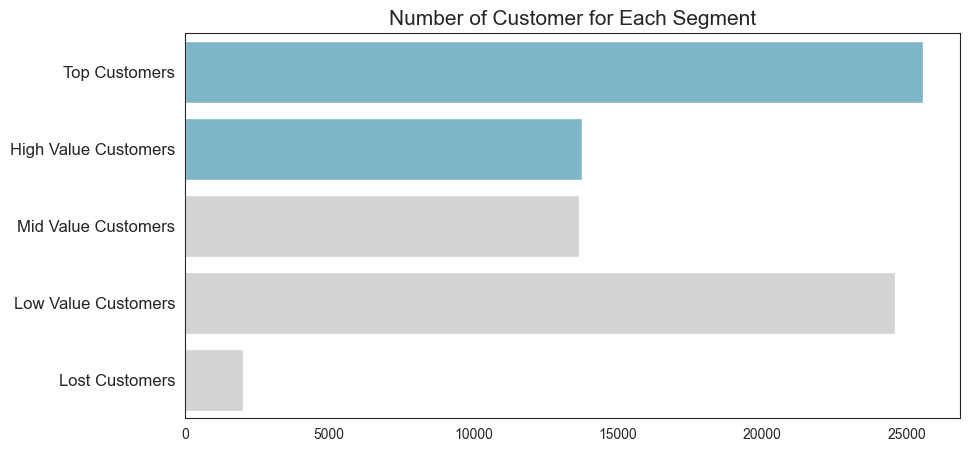

In [193]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Define the color palette
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Set the background style to 'white' to remove gridlines
sns.set_style("white")

# Create a bar plot
sns.barplot(
    x="customer_unique_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=True),
    hue="customer_segment",
    legend=False,
    palette=colors_,
)

# Set the title of the plot
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)

# Remove the labels for the x and y axes
plt.ylabel(None)
plt.xlabel(None)

# Set the size of the y-axis labels
plt.tick_params(axis="y", labelsize=12)

# Display the plot
plt.show()

### Question 5: What was the amount of money customers spent during the last three months of 2018?


In [194]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79593 entries, 0 to 79592
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  79593 non-null  object 
 1   frequency           79593 non-null  int64  
 2   monetary            79593 non-null  float64
 3   recency             79593 non-null  int64  
 4   r_rank_norm         79593 non-null  float64
 5   f_rank_norm         79593 non-null  float64
 6   m_rank_norm         79593 non-null  float64
 7   RFM_score           79593 non-null  float64
 8   customer_segment    79593 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 5.5+ MB


In [195]:
# Add a new column date in the rfm_df
rfm_df["date"] = orders_df["order_purchase_timestamp"].dt.date

# Convert strings to datetime.date using pandas
start_date = pd.to_datetime("2018-10-01").date()
end_date = pd.to_datetime("2018-12-31").date()

# Filter for the last quarter of 2018
rfm_df = rfm_df[(rfm_df["date"] >= start_date) & (rfm_df["date"] <= end_date)]

In [196]:
# Check the total spending of each customer in the last quarter of 2018
rfm_df.groupby("customer_unique_id", as_index=False).agg({"monetary": "sum"})
rfm_df[["customer_unique_id", "monetary"]].sort_values(
    by="monetary", ascending=False
).sum()

customer_unique_id    db90824b10235daffd0272fad194cd8c6627561739ed1d...
monetary                                                         665.33
dtype: object

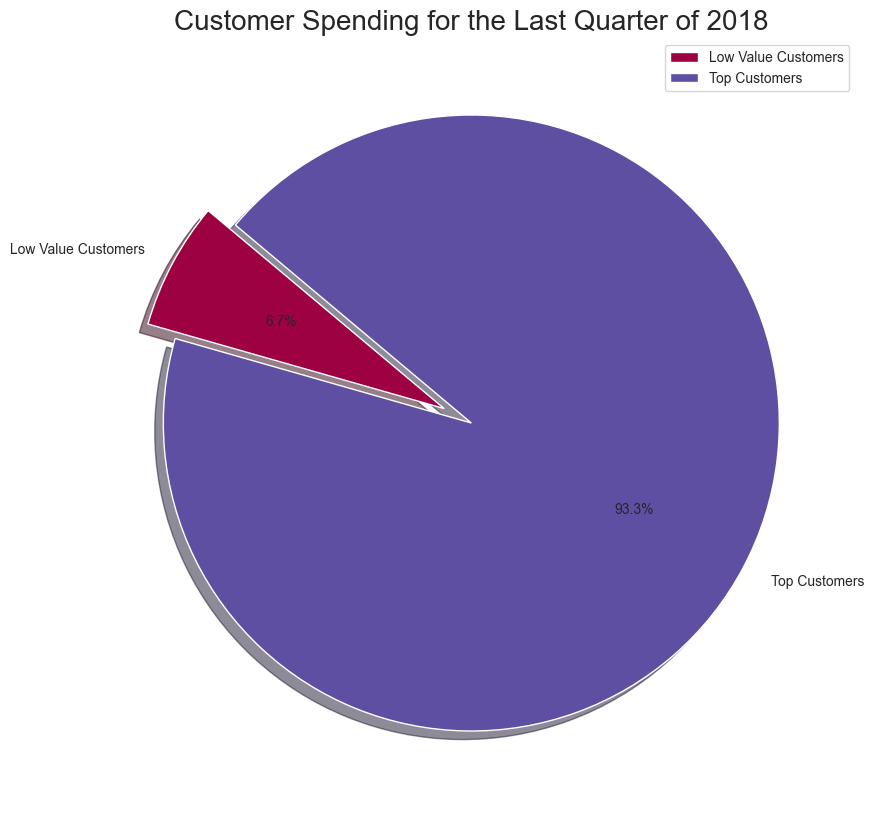

In [197]:
# Create a pie chart of the customer spending (monetary) for the last quarter of 2018
plt.figure(figsize=(10, 10))
plt.title("Customer Spending for the Last Quarter of 2018", fontsize=20)

# Define a colormap
cmap = plt.get_cmap("Spectral")

# Calculate the monetary values and labels
monetary_values = rfm_df.groupby(by=["customer_segment"])["monetary"].sum()
labels = monetary_values.index

# Create a color array
colors = cmap(np.linspace(0.0, 1.0, len(labels)))

# Explode the first slice
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

plt.pie(
    monetary_values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
)

# Add a legend
plt.legend(labels, loc="upper right")

plt.show()

## Conclusion


### Conclusion 1

Based on the visualization from the top 10 product categories with the highest average review score, the **product category** **with** the most **outstanding performance** in terms of rating **reviews from 2017 to 2018** is the **"cds_dvds_musicals"** category that means group of product music like CDs, DVDs, and musicals.


### Conclusion 2

**Based on the visualization** from the on-time delivery rate, **the on-time delivery rate is 93.7%**. Since the on-time delivery measures the ability of a company to deliver orders on time, **then we can conclude** that the on-time delivery rate **is good enough**. But, we can improve it by doing some actions like:

1. Use forecasting methods and invest in additional inventory.
2. Utilize microdistribution centers.
3. Leverage real-time transportation data.
4. Prioritize high-margin, fast-moving SKUs.
5. Improve supplier relationships.


### Conclusion 3

Based on the visualization from the customer profile, the demographic profile of our customer base are:

**Top 10 states** with the highest number of customers are:

1. Sao Paulo
2. Minas Gerais
3. Rio de Janeiro
4. Bahia
5. Pernambuco
6. Ceara
7. Parana
8. Rio Grande do Sul
9. Santa Catarina
10. Federal District

**Top 10 cities** with the highest number of customers are:

1. Sao Paulo
2. Rio de Janeiro
3. Belo Horizonte
4. Brasilia
5. Curitiba
6. Campinas
7. Porto Alegre
8. Salvador
9. Guarulhos
10. Niteroi


### Conclusion 4

**Based on the monetary value**, the total amount of money spent by customers of all time is **R$ 7.484.221**.

**Based on the customer segmentation using RFM analysis**, Top customers are in the first position, Low Value customers are in the second position, and the High-value customers are in the third position, it suggests that **the business has a significant number of customers who are not spending much but are still active**. The top customers are the most valuable customers who have made recent and frequent purchases, while the high-value customers are those who have made significant purchases but not as frequently. The business should focus on retaining the top customers and increasing the value of the high-value customers by encouraging them to make more frequent purchases.


### Conclusion 5

Based on the visualization from the **total amount of money** customers spent **during the last three months of 2018**, the total amount of money customers spent during the last three months of 2018 **is R$ 665.33** and the most spender **comes from Top customers segment**.


## Save the data all_df to csv


In [198]:
# Drop unnecessary column in the rfm_df to merge with the all_df so that we can get the customer's segment
rfm_df.drop(["r_rank_norm", "f_rank_norm", "m_rank_norm"], axis=1, inplace=True)
rfm_df.head(5)

,customer_unique_id,frequency,monetary,recency,RFM_score,customer_segment,date
31891,6627561739ed1d8426400696df79f653,1,229.04,299,3.72,Top Customers,2018-10-03
60938,c3cfb1f45e6904590b3d372ff6bee982,1,44.49,389,1.64,Low Value Customers,2018-10-17
68373,db90824b10235daffd0272fad194cd8c,1,391.80,310,3.82,Top Customers,2018-10-16


In [199]:
# Merge the rfm_df to all_df
all_df = all_df.merge(rfm_df, on="customer_unique_id", how="left")

In [200]:
# Save the dataframe to a CSV file named "all_data.csv"
all_df.to_csv("all_data.csv", index=False)